# load library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import Ridge


from sklearn import metrics


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load Dataset

In [2]:
url = 'https://raw.githubusercontent.com/Jessadakorn-pun/Dataset/main/HousingData.csv'
df = pd.read_csv(url)
df.head(10)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87   NaN  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87   NaN  0.524  6.004   85.9  6.5921    5  311     15.2   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
5  394.12   5.21  28.7  
6  395.60  12.43  22.9  
7  396.90  19.15  27.1  
8  386.63  29.93  16.5  
9  386.71  17.10  18.9

In [4]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
df['LSTAT'] = imp.fit_transform(df[['LSTAT']])

In [5]:
X = df[['LSTAT']]
y = df['MEDV']

# Split data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=1)

In [7]:
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')

X_train.shape = (354, 1)
X_test.shape = (152, 1)


# Fitting Ridge with linear regression

In [33]:
def train(model, X_train, y_train, X_test, y_test, model_name, cols):
    ## fitting model
    model.fit(X_train, y_train)
    ####model = rc.estimator_
    coef = model.coef_
    inter = model.intercept_ 
    
    ## predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ## score
    mse_tr = metrics.mean_squared_error(y_train, y_train_pred)
    mse_te = metrics.mean_squared_error(y_test, y_test_pred)
    r2_tr = metrics.r2_score(y_train, y_train_pred)
    r2_te = metrics.r2_score(y_test, y_test_pred)
    
    ## cols = ['model name', 'Coef', 'Intercept', 'MSE Train', 'MSE Test', 'R2 Train', 'R2 Test']
    collect = [model_name, coef, inter, mse_tr, mse_te, r2_tr, r2_te]
    
    ## ploting result
    #inliner_mask = rc.inlier_mask_
    #outliner_mask = np.logical_not(inliner_mask)
    
    fig, ax = plt.subplots(1, 2, figsize = (20, 10))
    ax[0].plot(X_train, y_train_pred, color = 'black', lw = 2)
    ax[0].scatter(X_train, y_train, c = 'green', alpha = .5)
    ax[0].set_title(f'Train Data : {model_name}')
    #ax[0].scatter(X_train[inliner_mask], y_train[inliner_mask], color = 'orange', edgecolors = 'black', alpha=.5)
    
    ax[1].plot(X_test, y_test_pred, color = 'black', lw = 2)
    ax[1].scatter(X_test, y_test, c = 'blue', alpha = .5)
    ax[1].set_title(f'Test Data : {model_name}')
    #ax[1].scatter(X_test[inliner_mask], y_test[inliner_mask], color = 'red', alpha=.5)
    
    
    
    return collect

model name      Coef  Intercept  MSE Train   MSE Test  R2 Train  \
0        Ridge-1 -0.911225  34.164568  38.910925  43.713057  0.520737   
1      Ridge-100 -0.906247  34.099972  38.912212  43.772616  0.520721   
2    Ridge-10000 -0.586084  29.945291  44.294811  52.324422  0.454424   
3  Ridge-1000000 -0.016133  22.549183  79.705361  90.556182  0.018275   

    R2 Test  
0  0.523067  
1  0.522417  
2  0.429112  
3  0.011983

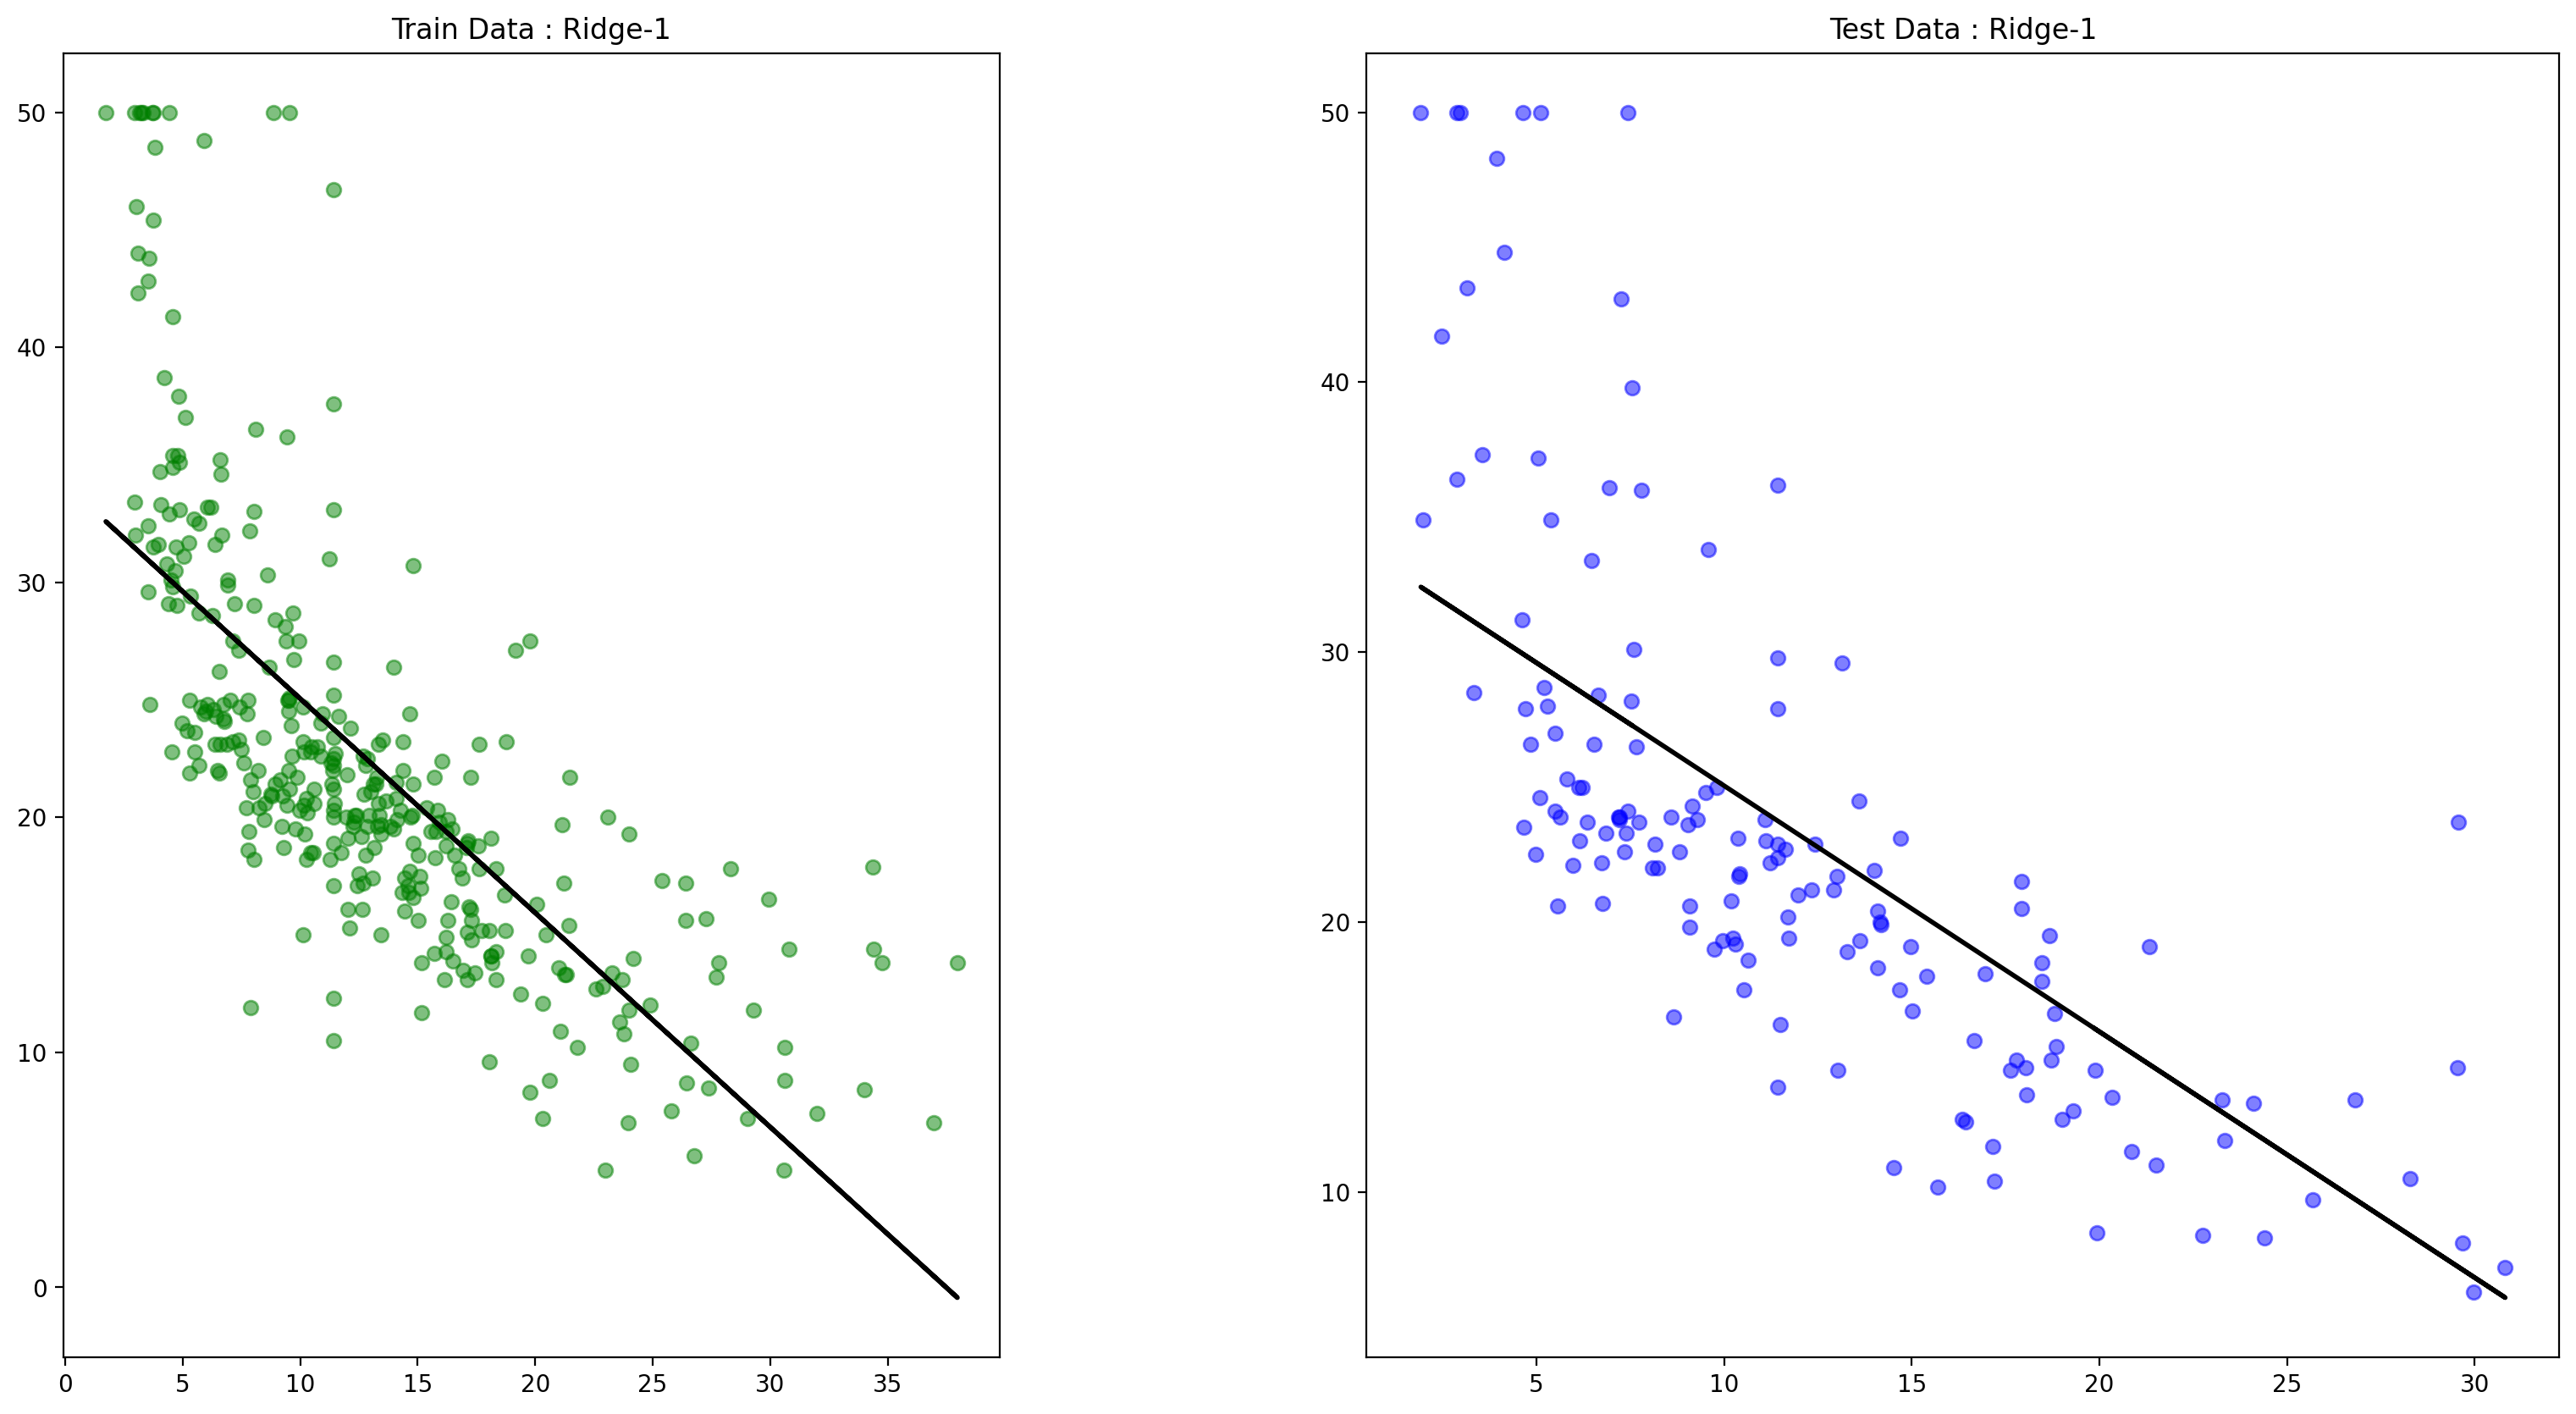

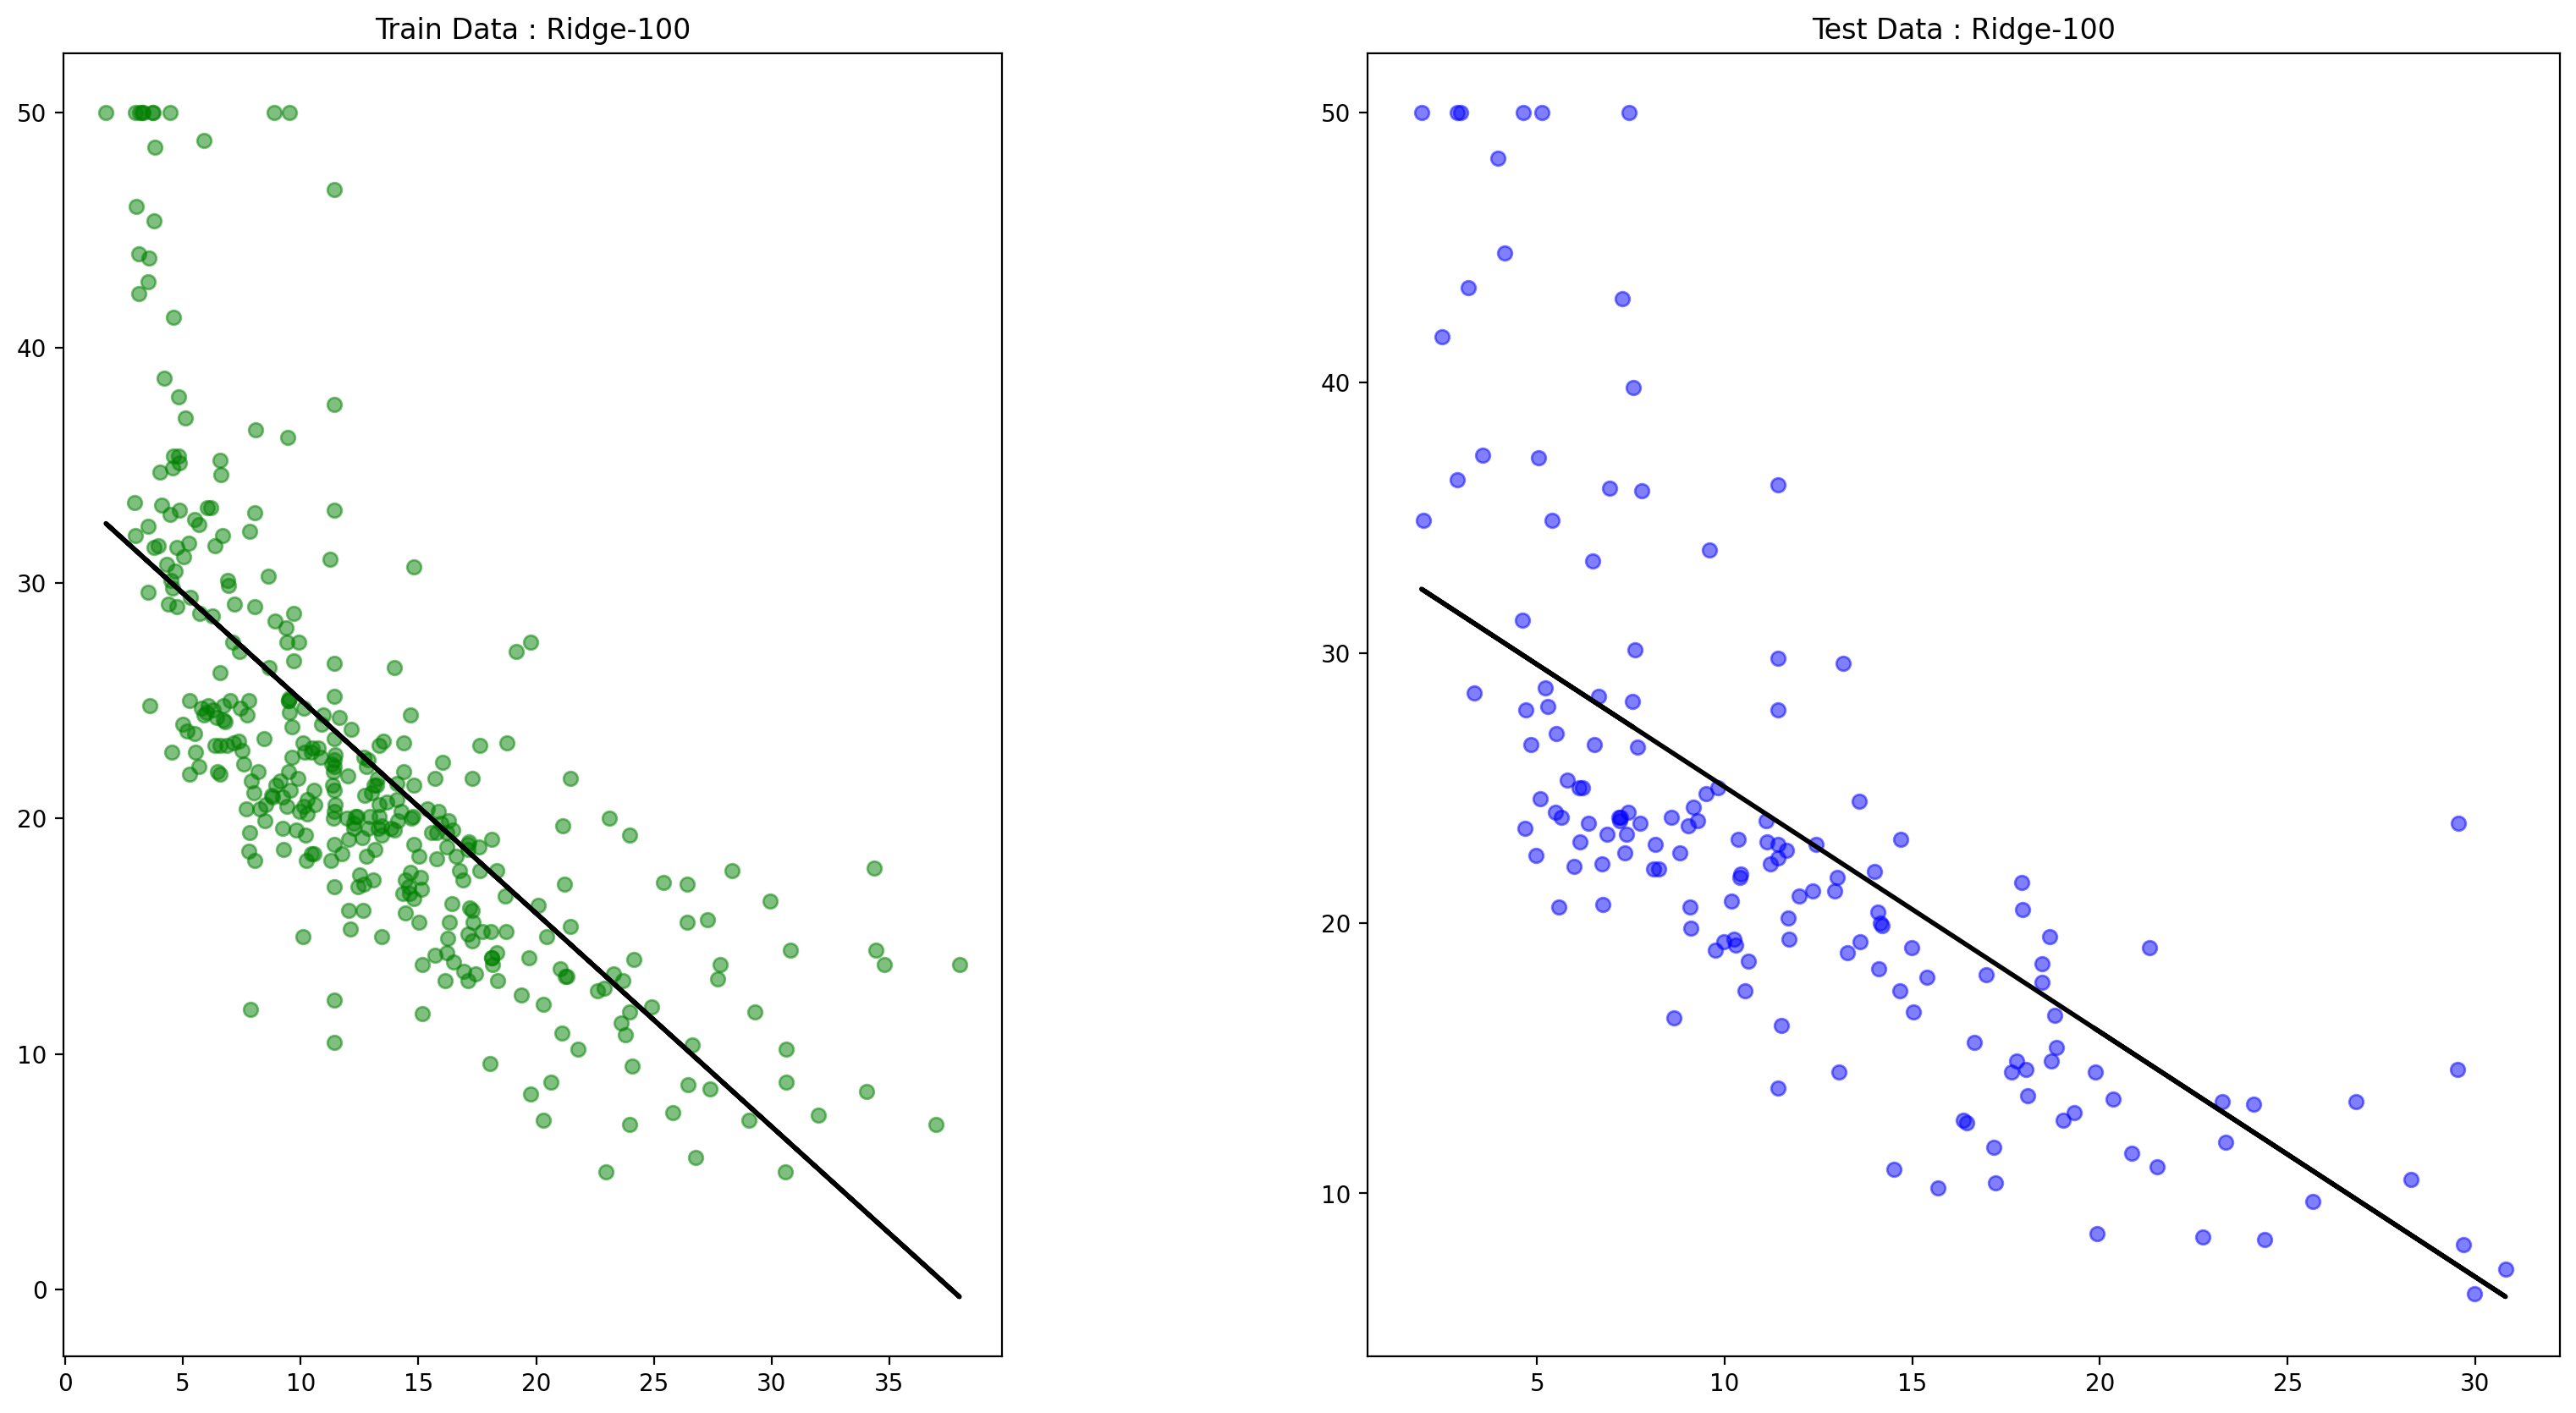

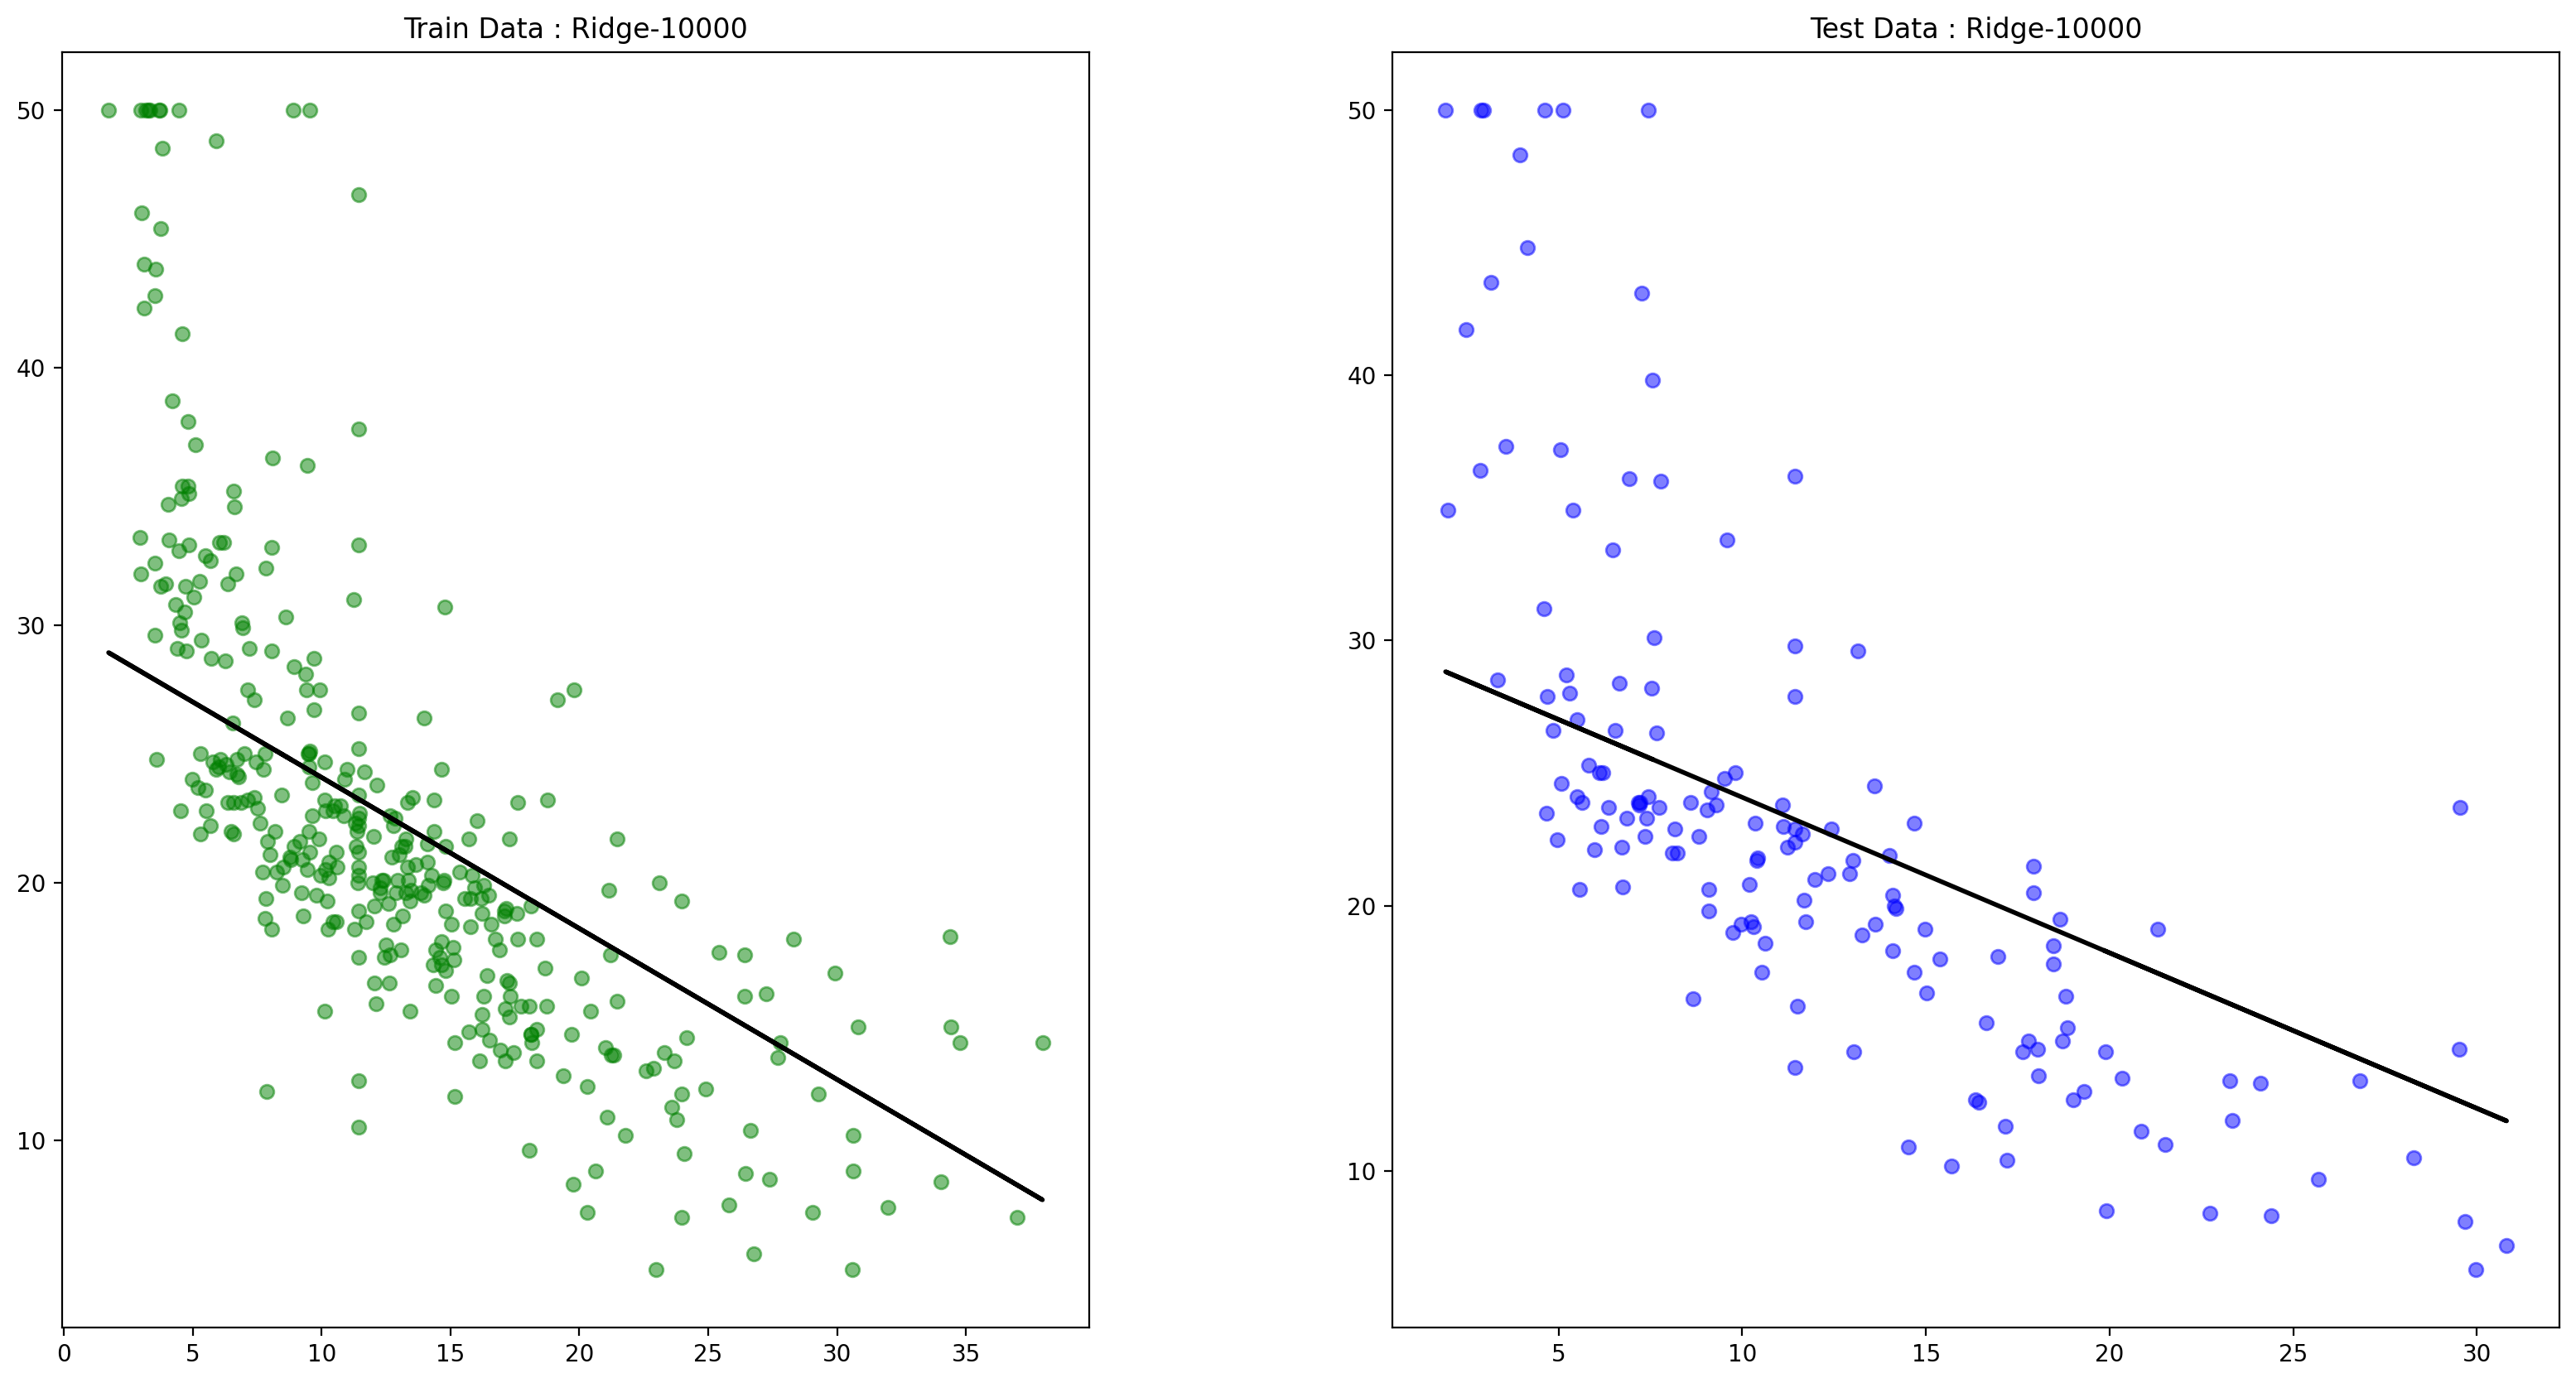

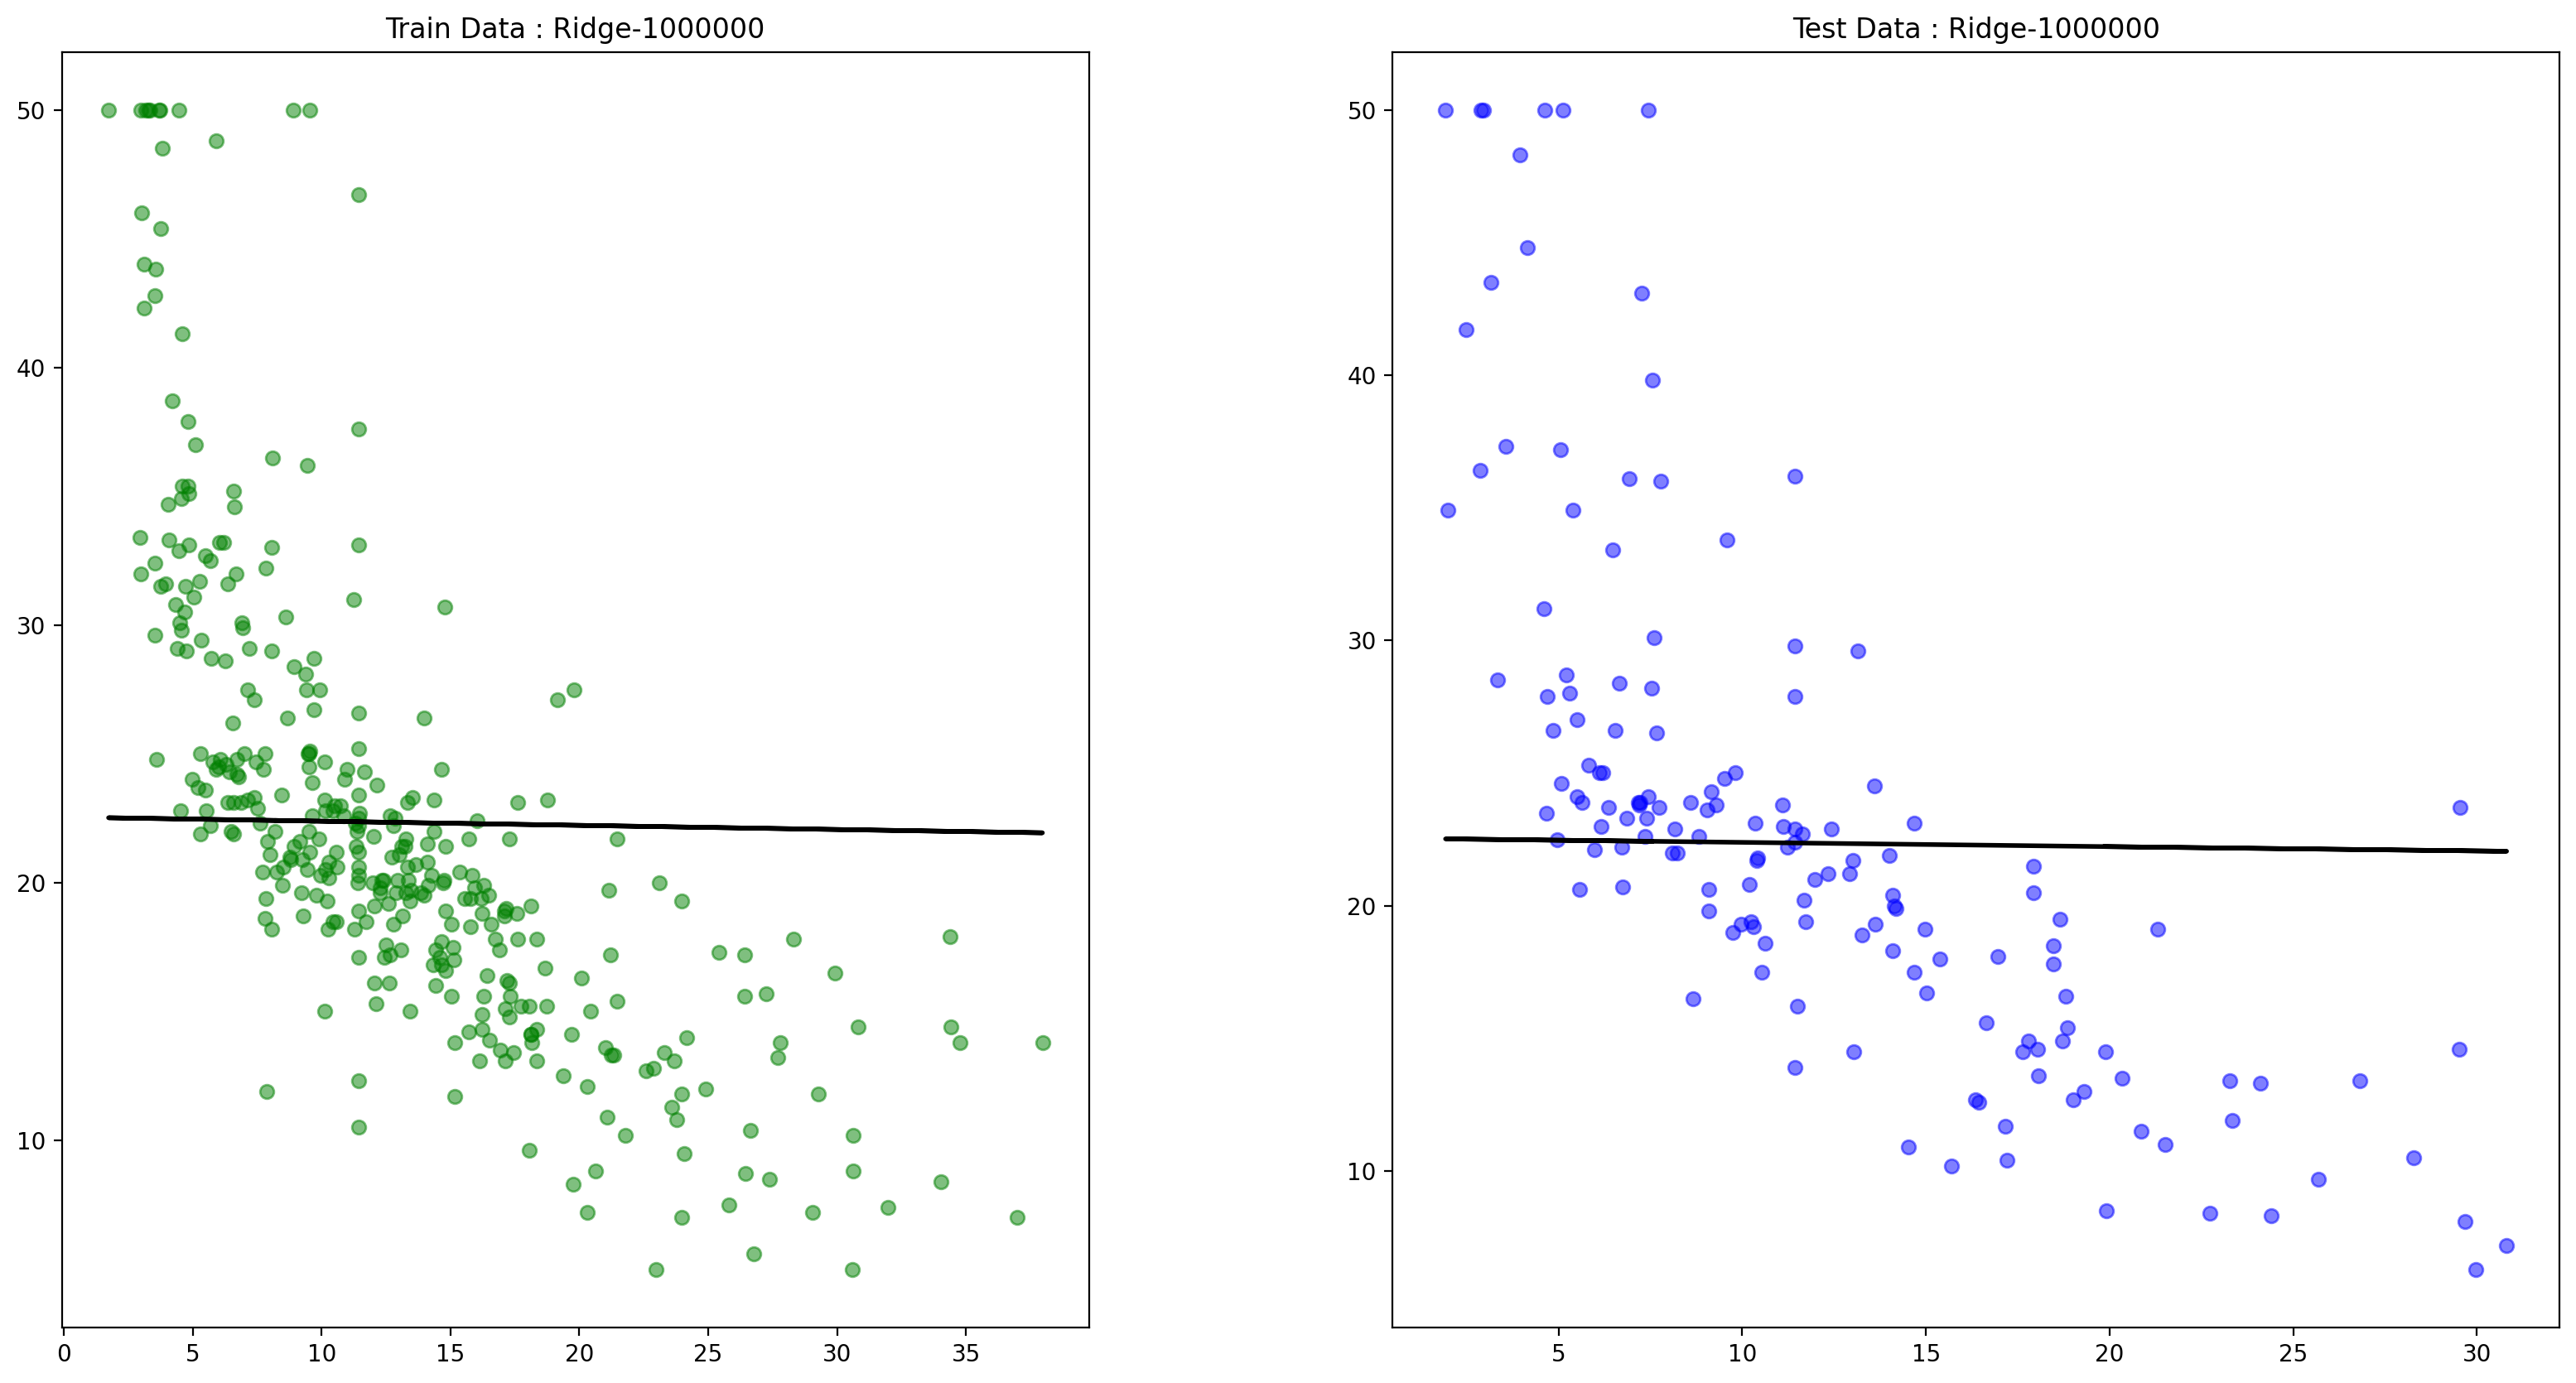

In [32]:
params = [1, 100, 10**4, 10**6]
cols = ['model name', 'Coef', 'Intercept', 'MSE Train', 'MSE Test', 'R2 Train', 'R2 Test']

result = pd.DataFrame(columns = cols)

for alpha in params:
    
    ridge = Ridge(alpha=alpha)
    model_name = f'Ridge-{alpha}'
    
    collect = train(ridge, X_train, y_train, X_test, y_test, model_name, cols)
    df2 = pd.DataFrame({
        'model name' : collect[0],
        'Coef' : collect[1],
        'Intercept' : collect[2],
        'MSE Train' : collect[3],
        'MSE Test' : collect[4],
        'R2 Train' : collect[5],
        'R2 Test' : collect[6],
    })
    result = pd.concat([result, df2], axis = 0, ignore_index=True)
    
result
    

# Lasso

model name      Coef  Intercept  MSE Train   MSE Test  R2 Train  \
0        Lasso-1 -0.891633  33.910336  38.930566  43.960451  0.520495   
1      Lasso-100 -0.000000  22.339831  81.189063  92.067173  0.000000   
2    Lasso-10000 -0.000000  22.339831  81.189063  92.067173  0.000000   
3  Lasso-1000000 -0.000000  22.339831  81.189063  92.067173  0.000000   

    R2 Test  
0  0.520368  
1 -0.004503  
2 -0.004503  
3 -0.004503

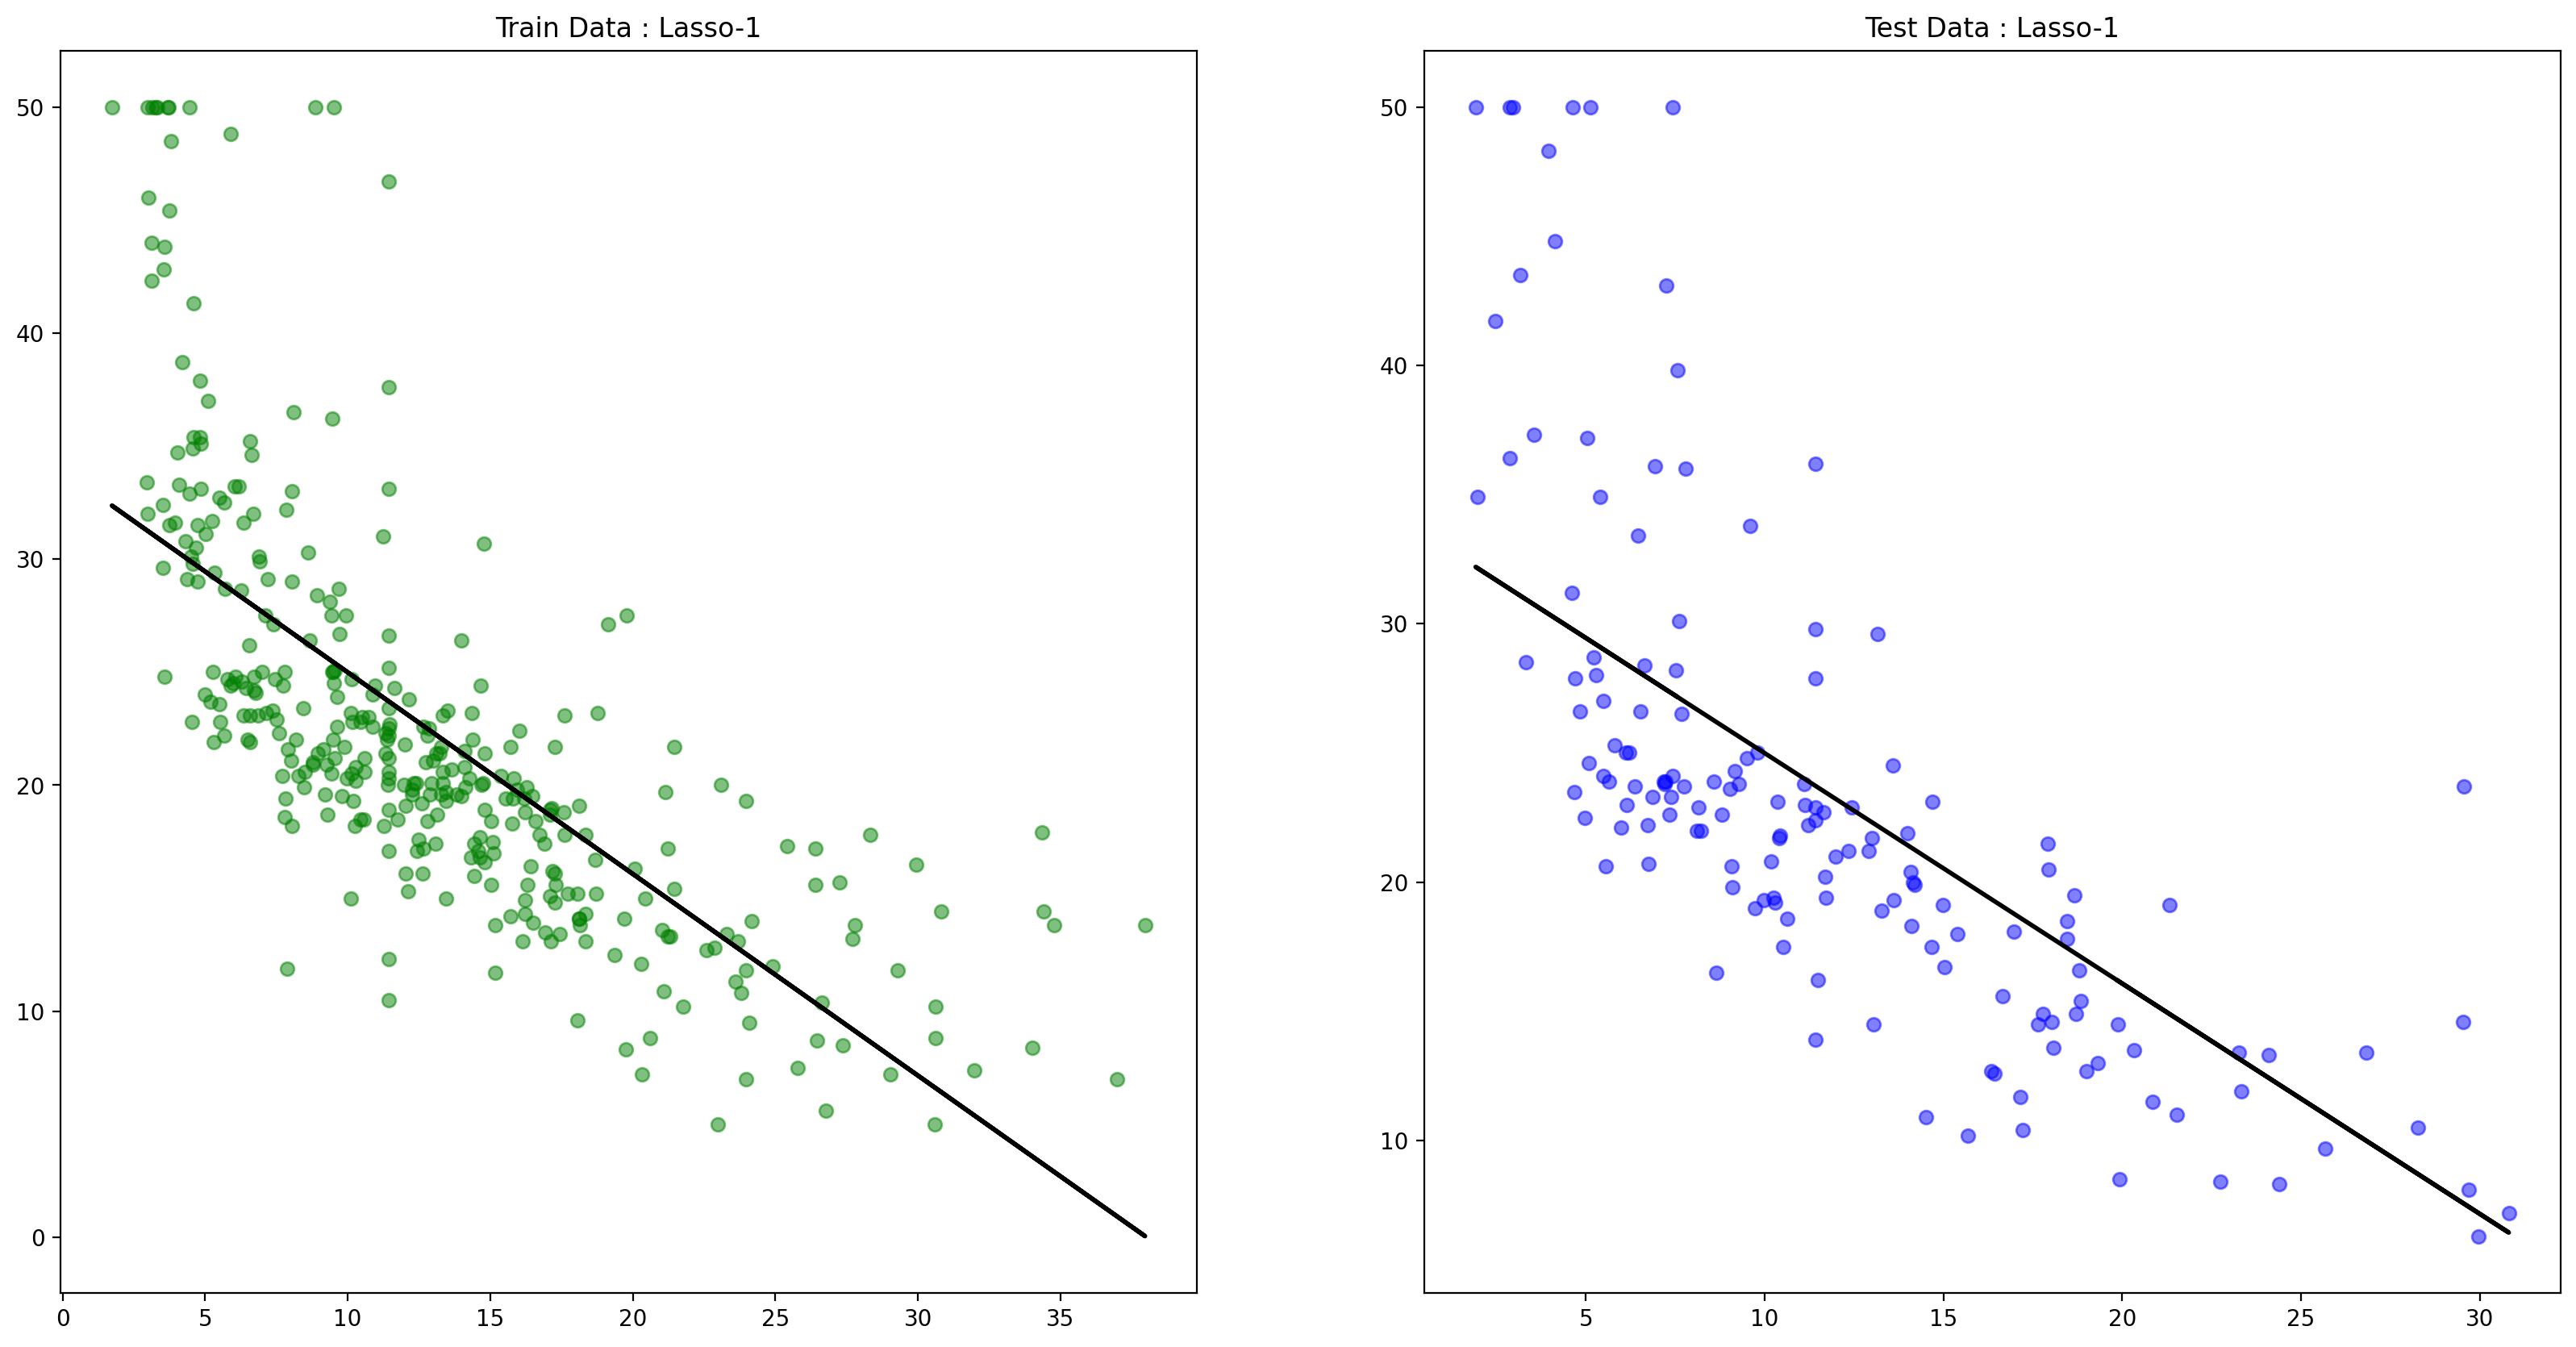

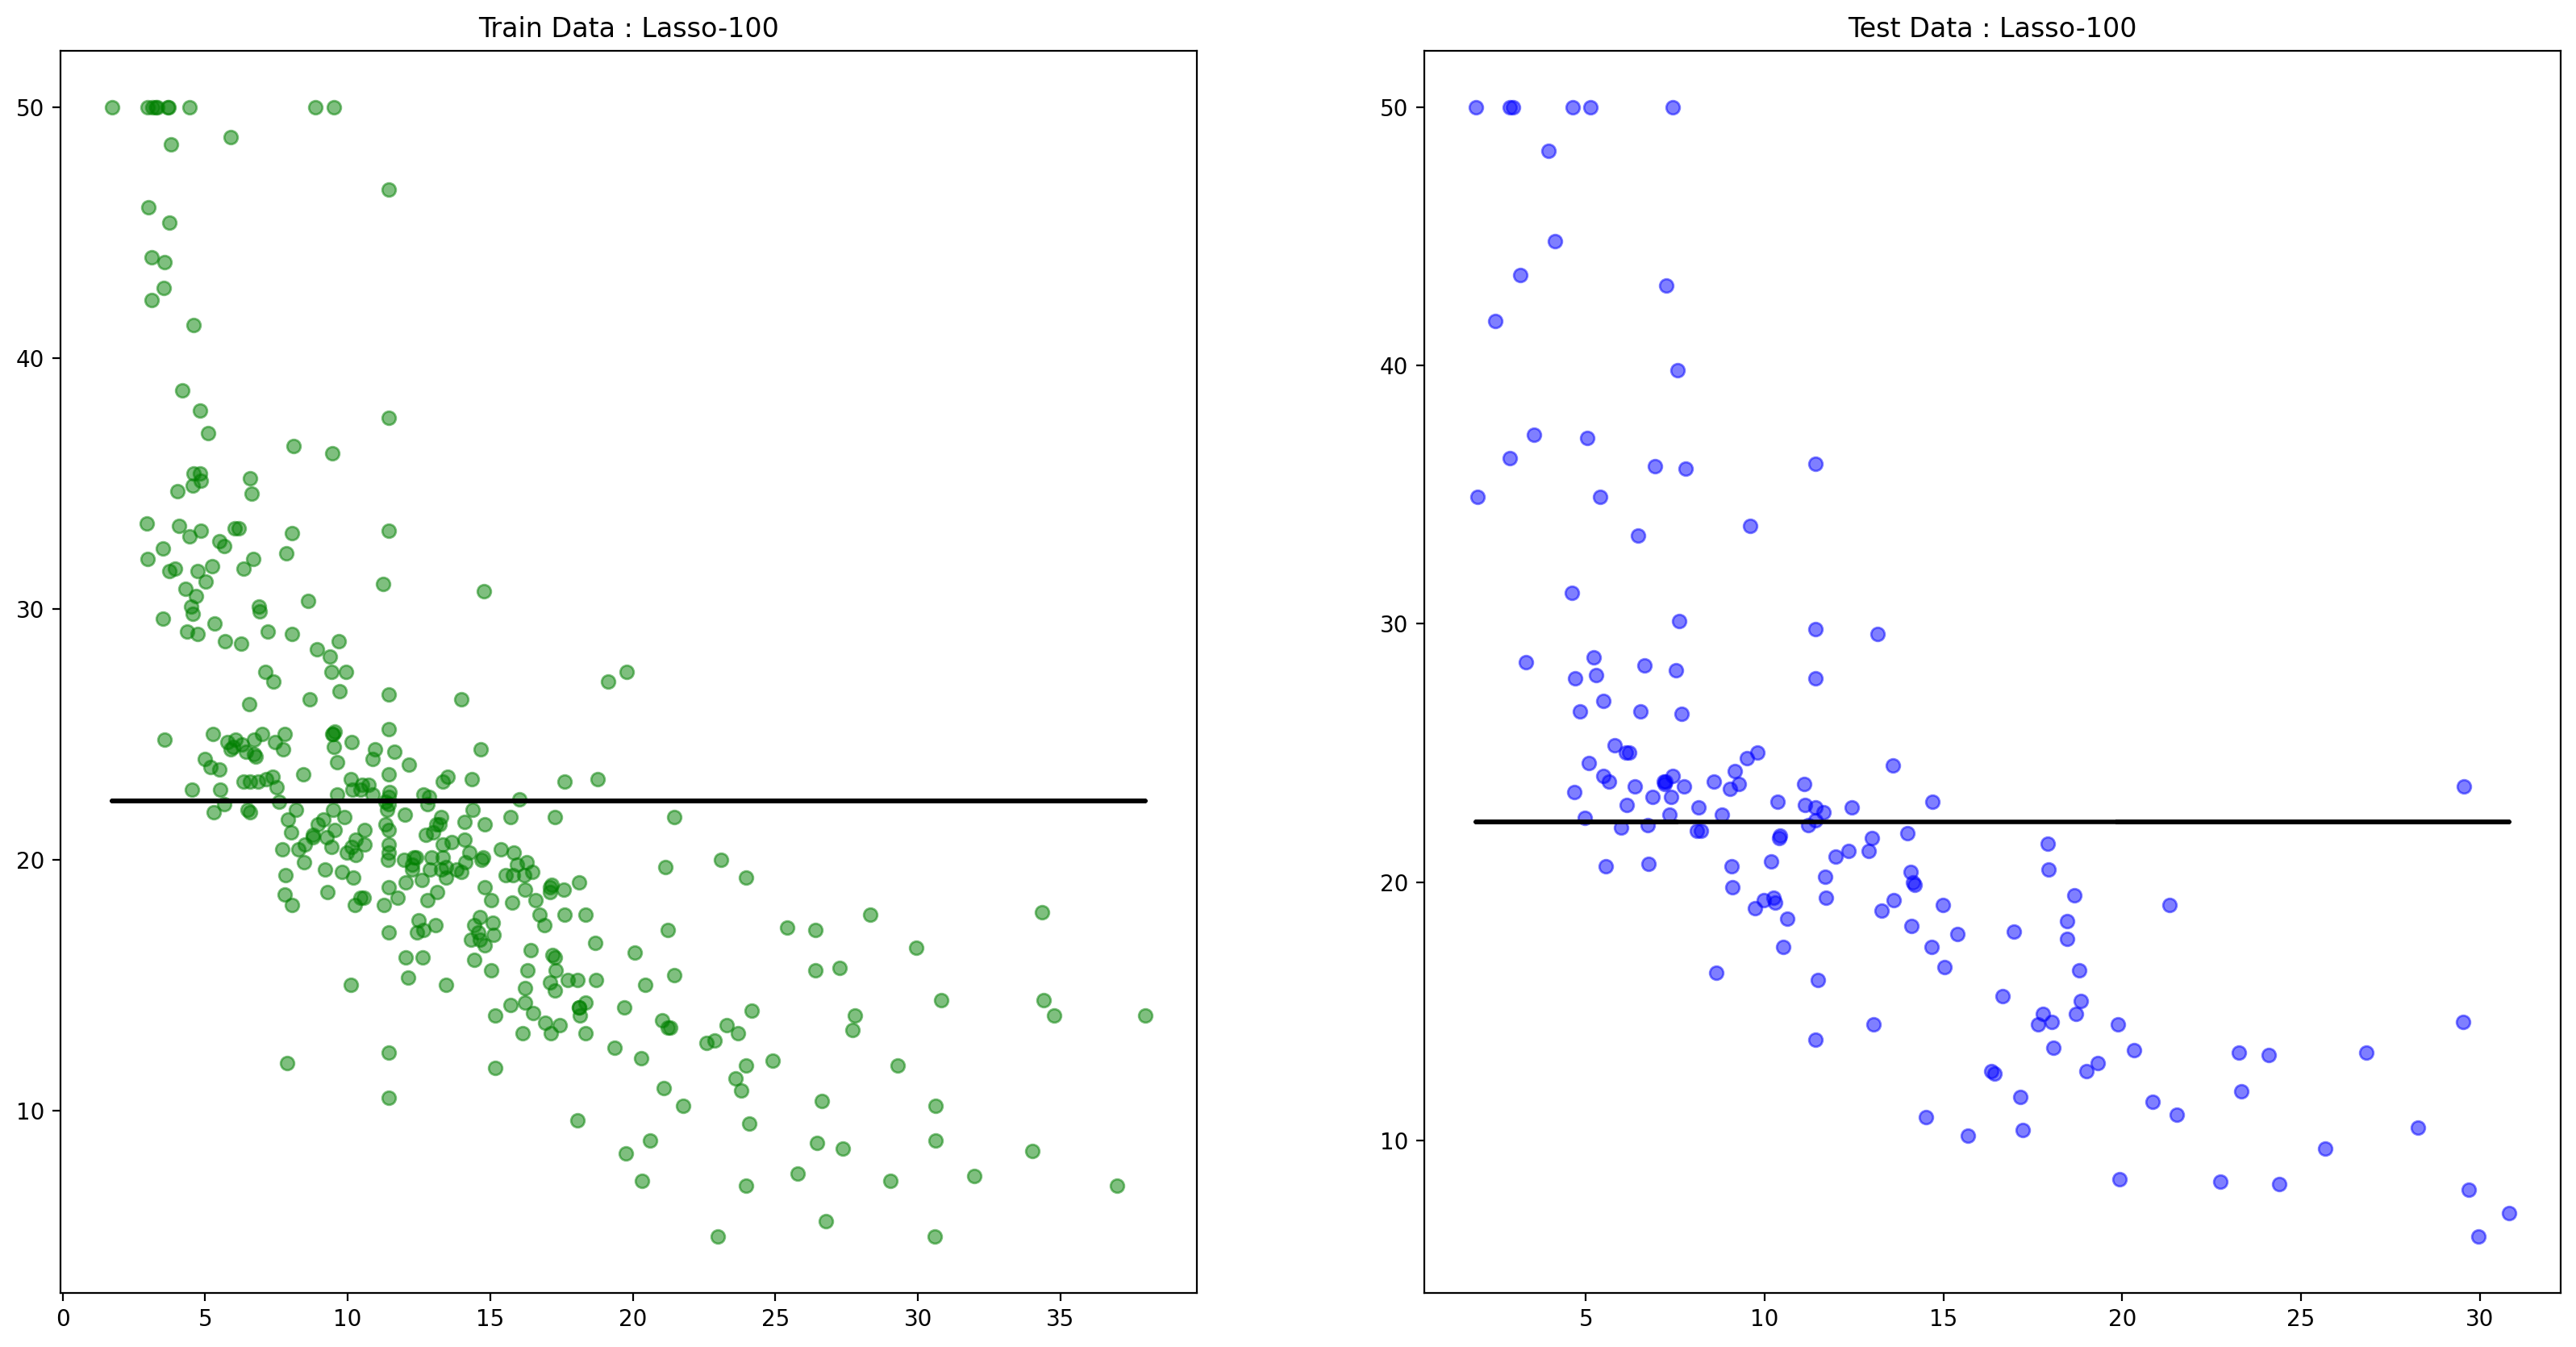

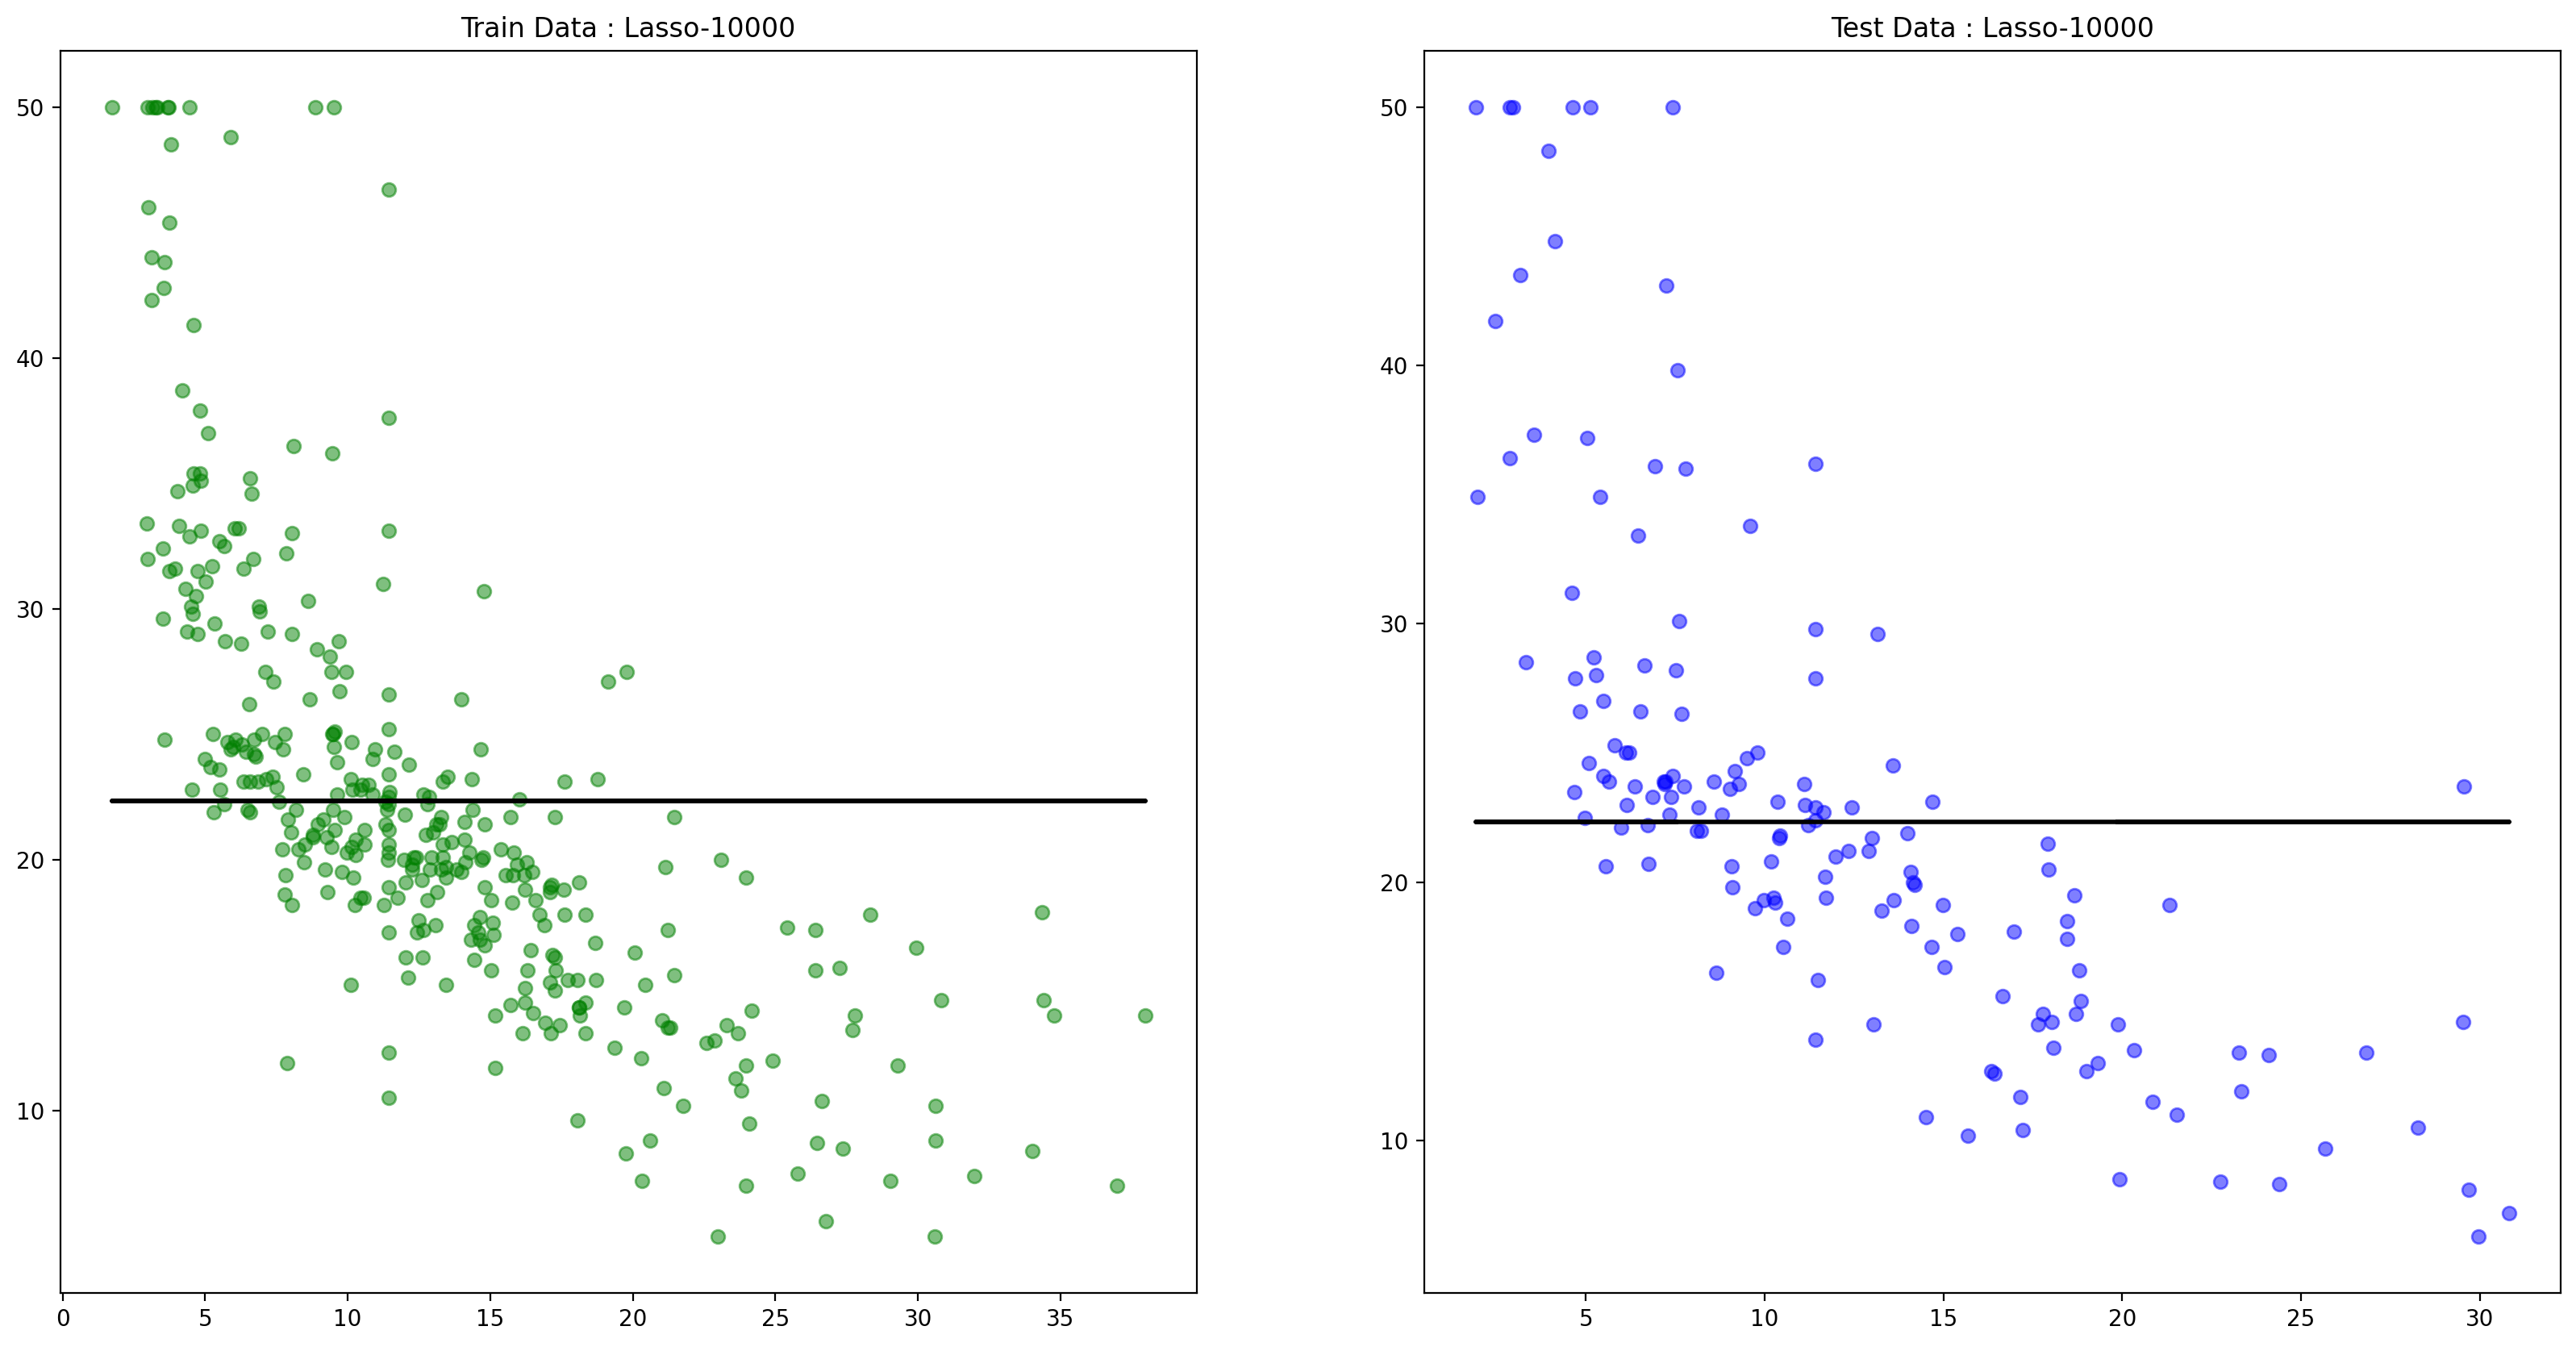

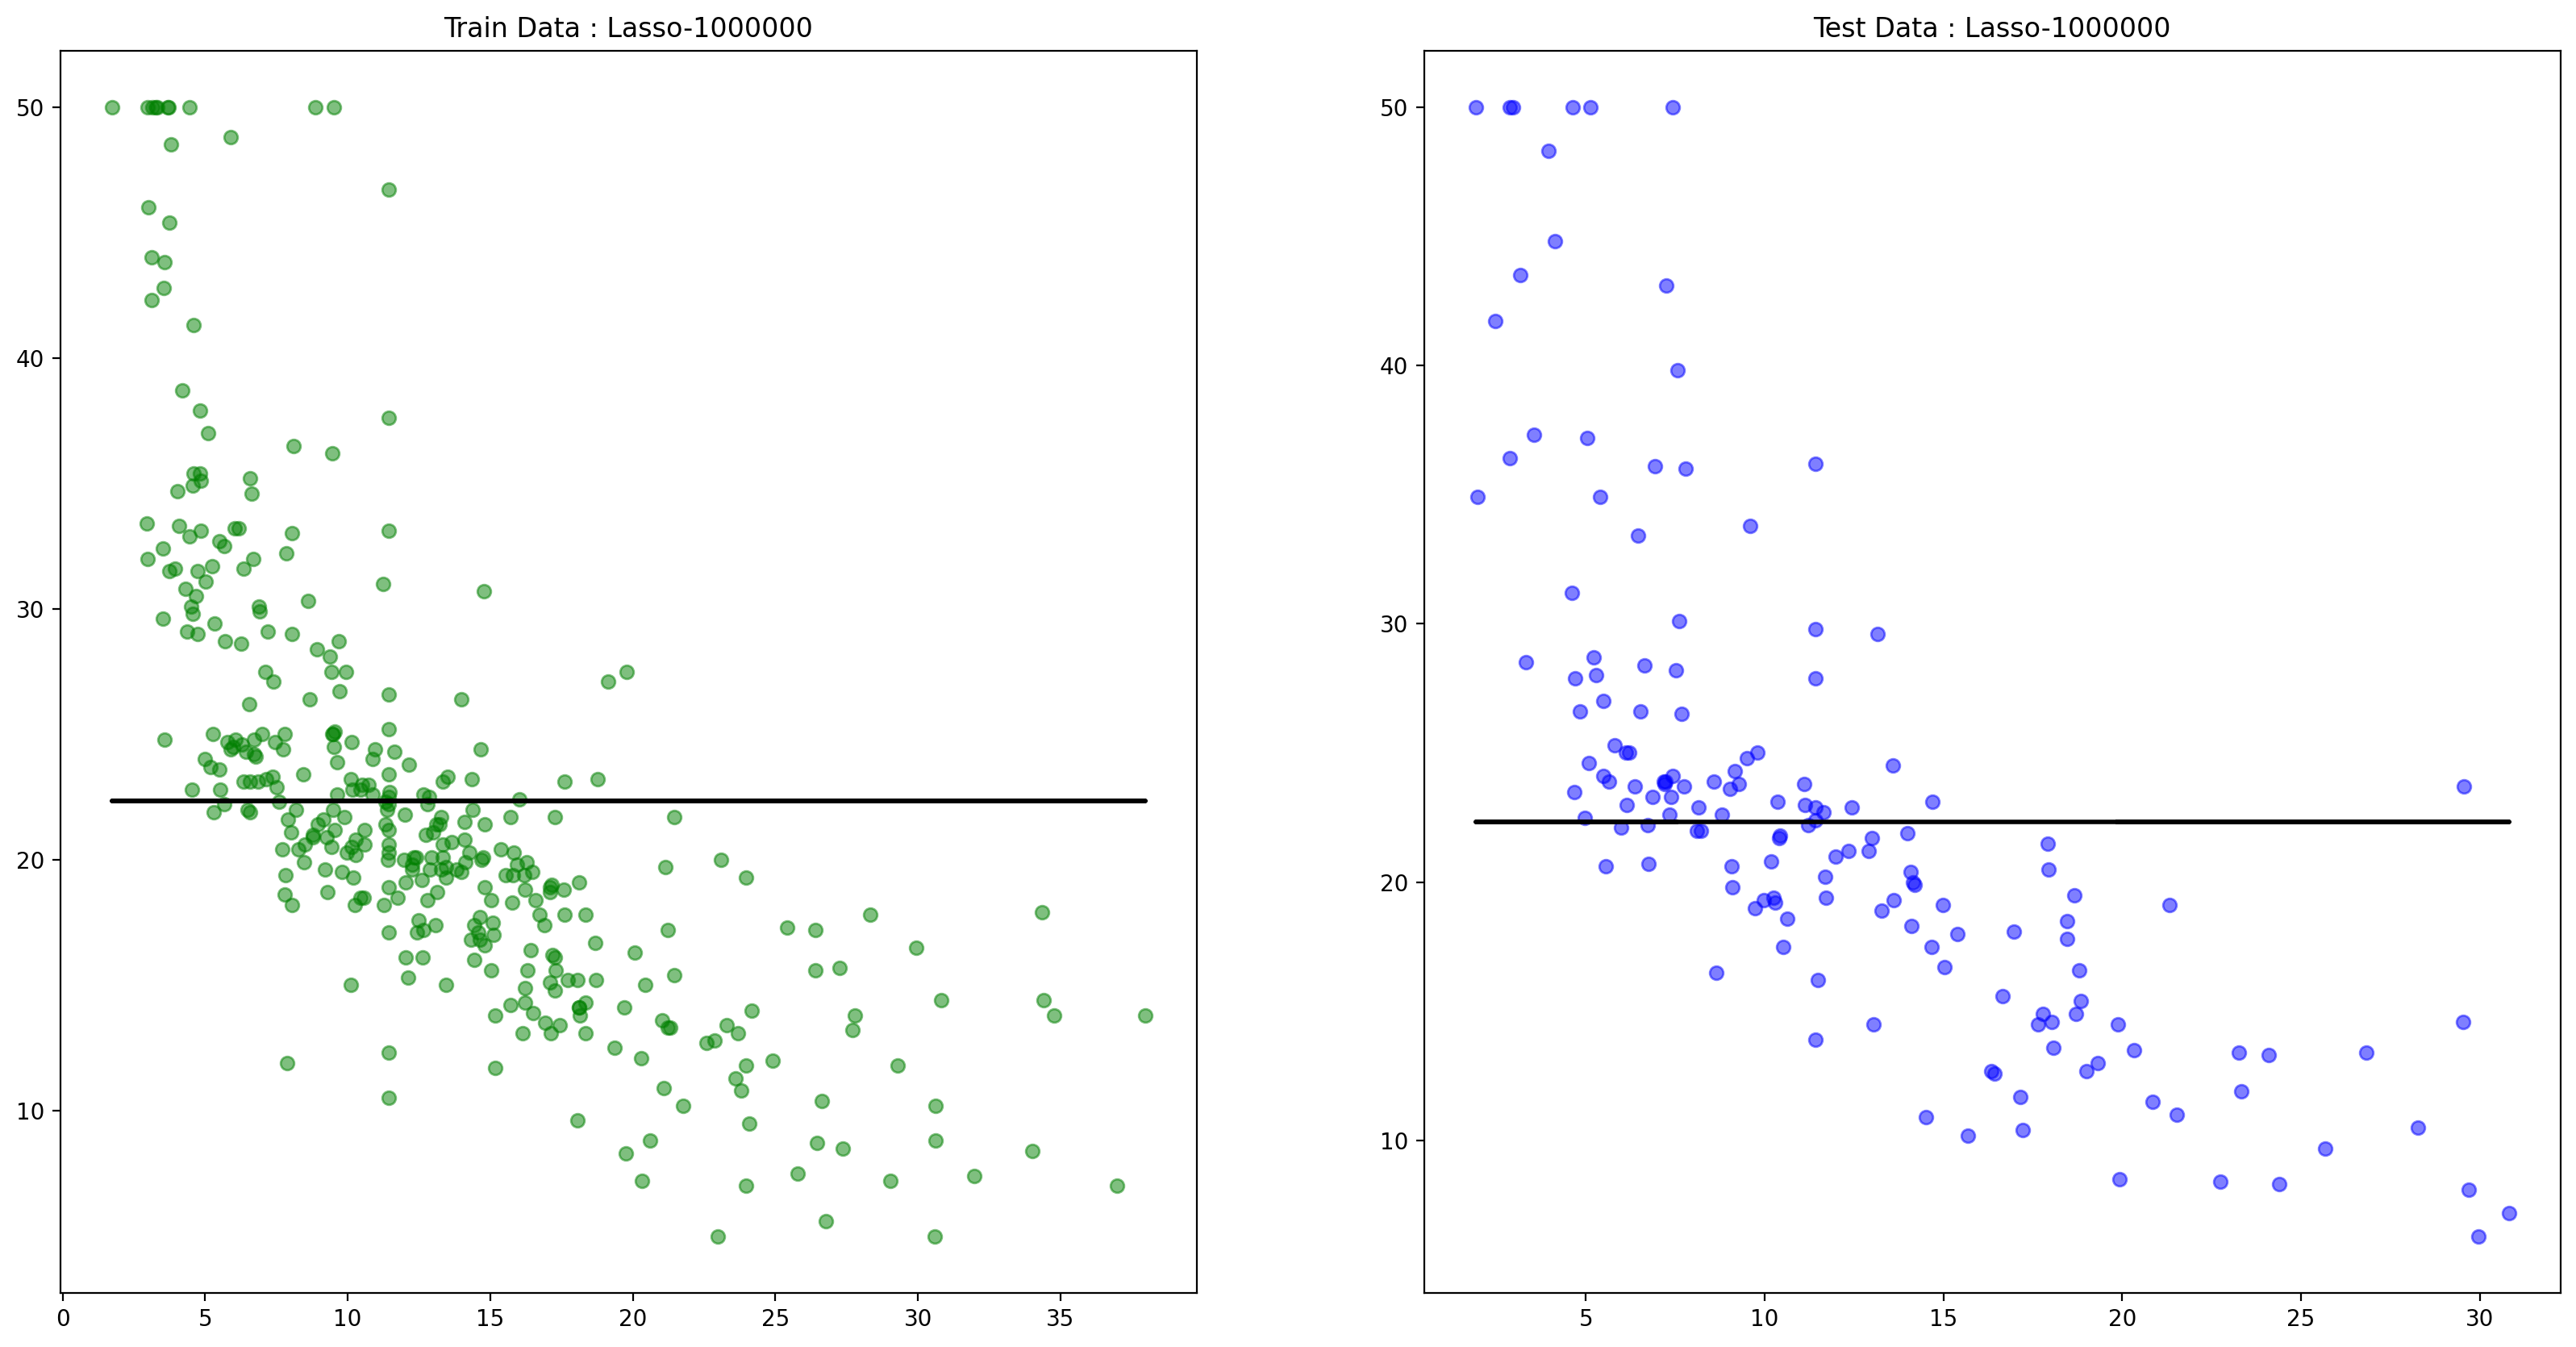

In [27]:
from sklearn.linear_model import Lasso
params = [1, 100, 10**4, 10**6]
cols = ['model name', 'Coef', 'Intercept', 'MSE Train', 'MSE Test', 'R2 Train', 'R2 Test']

result = pd.DataFrame(columns = cols)

for alpha in params:
    
    ridge = Lasso(alpha=alpha)
    model_name = f'Lasso-{alpha}'
    
    collect = train(ridge, X_train, y_train, X_test, y_test, model_name, cols)
    df2 = pd.DataFrame({
        'model name' : collect[0],
        'Coef' : collect[1],
        'Intercept' : collect[2],
        'MSE Train' : collect[3],
        'MSE Test' : collect[4],
        'R2 Train' : collect[5],
        'R2 Test' : collect[6],
    })
    result = pd.concat([result, df2], axis = 0, ignore_index=True)
    
result

# Elastic Net

model name      Coef  Intercept  MSE Train   MSE Test  \
0        Elastic net-(1, 0.5) -0.892687  33.924012  38.928515  43.946257   
1      Elastic net-(100, 0.5) -0.000000  22.339831  81.189063  92.067173   
2    Elastic net-(10000, 0.5) -0.000000  22.339831  81.189063  92.067173   
3  Elastic net-(1000000, 0.5) -0.000000  22.339831  81.189063  92.067173   

   R2 Train   R2 Test  
0   0.52052  0.520523  
1   0.00000 -0.004503  
2   0.00000 -0.004503  
3   0.00000 -0.004503

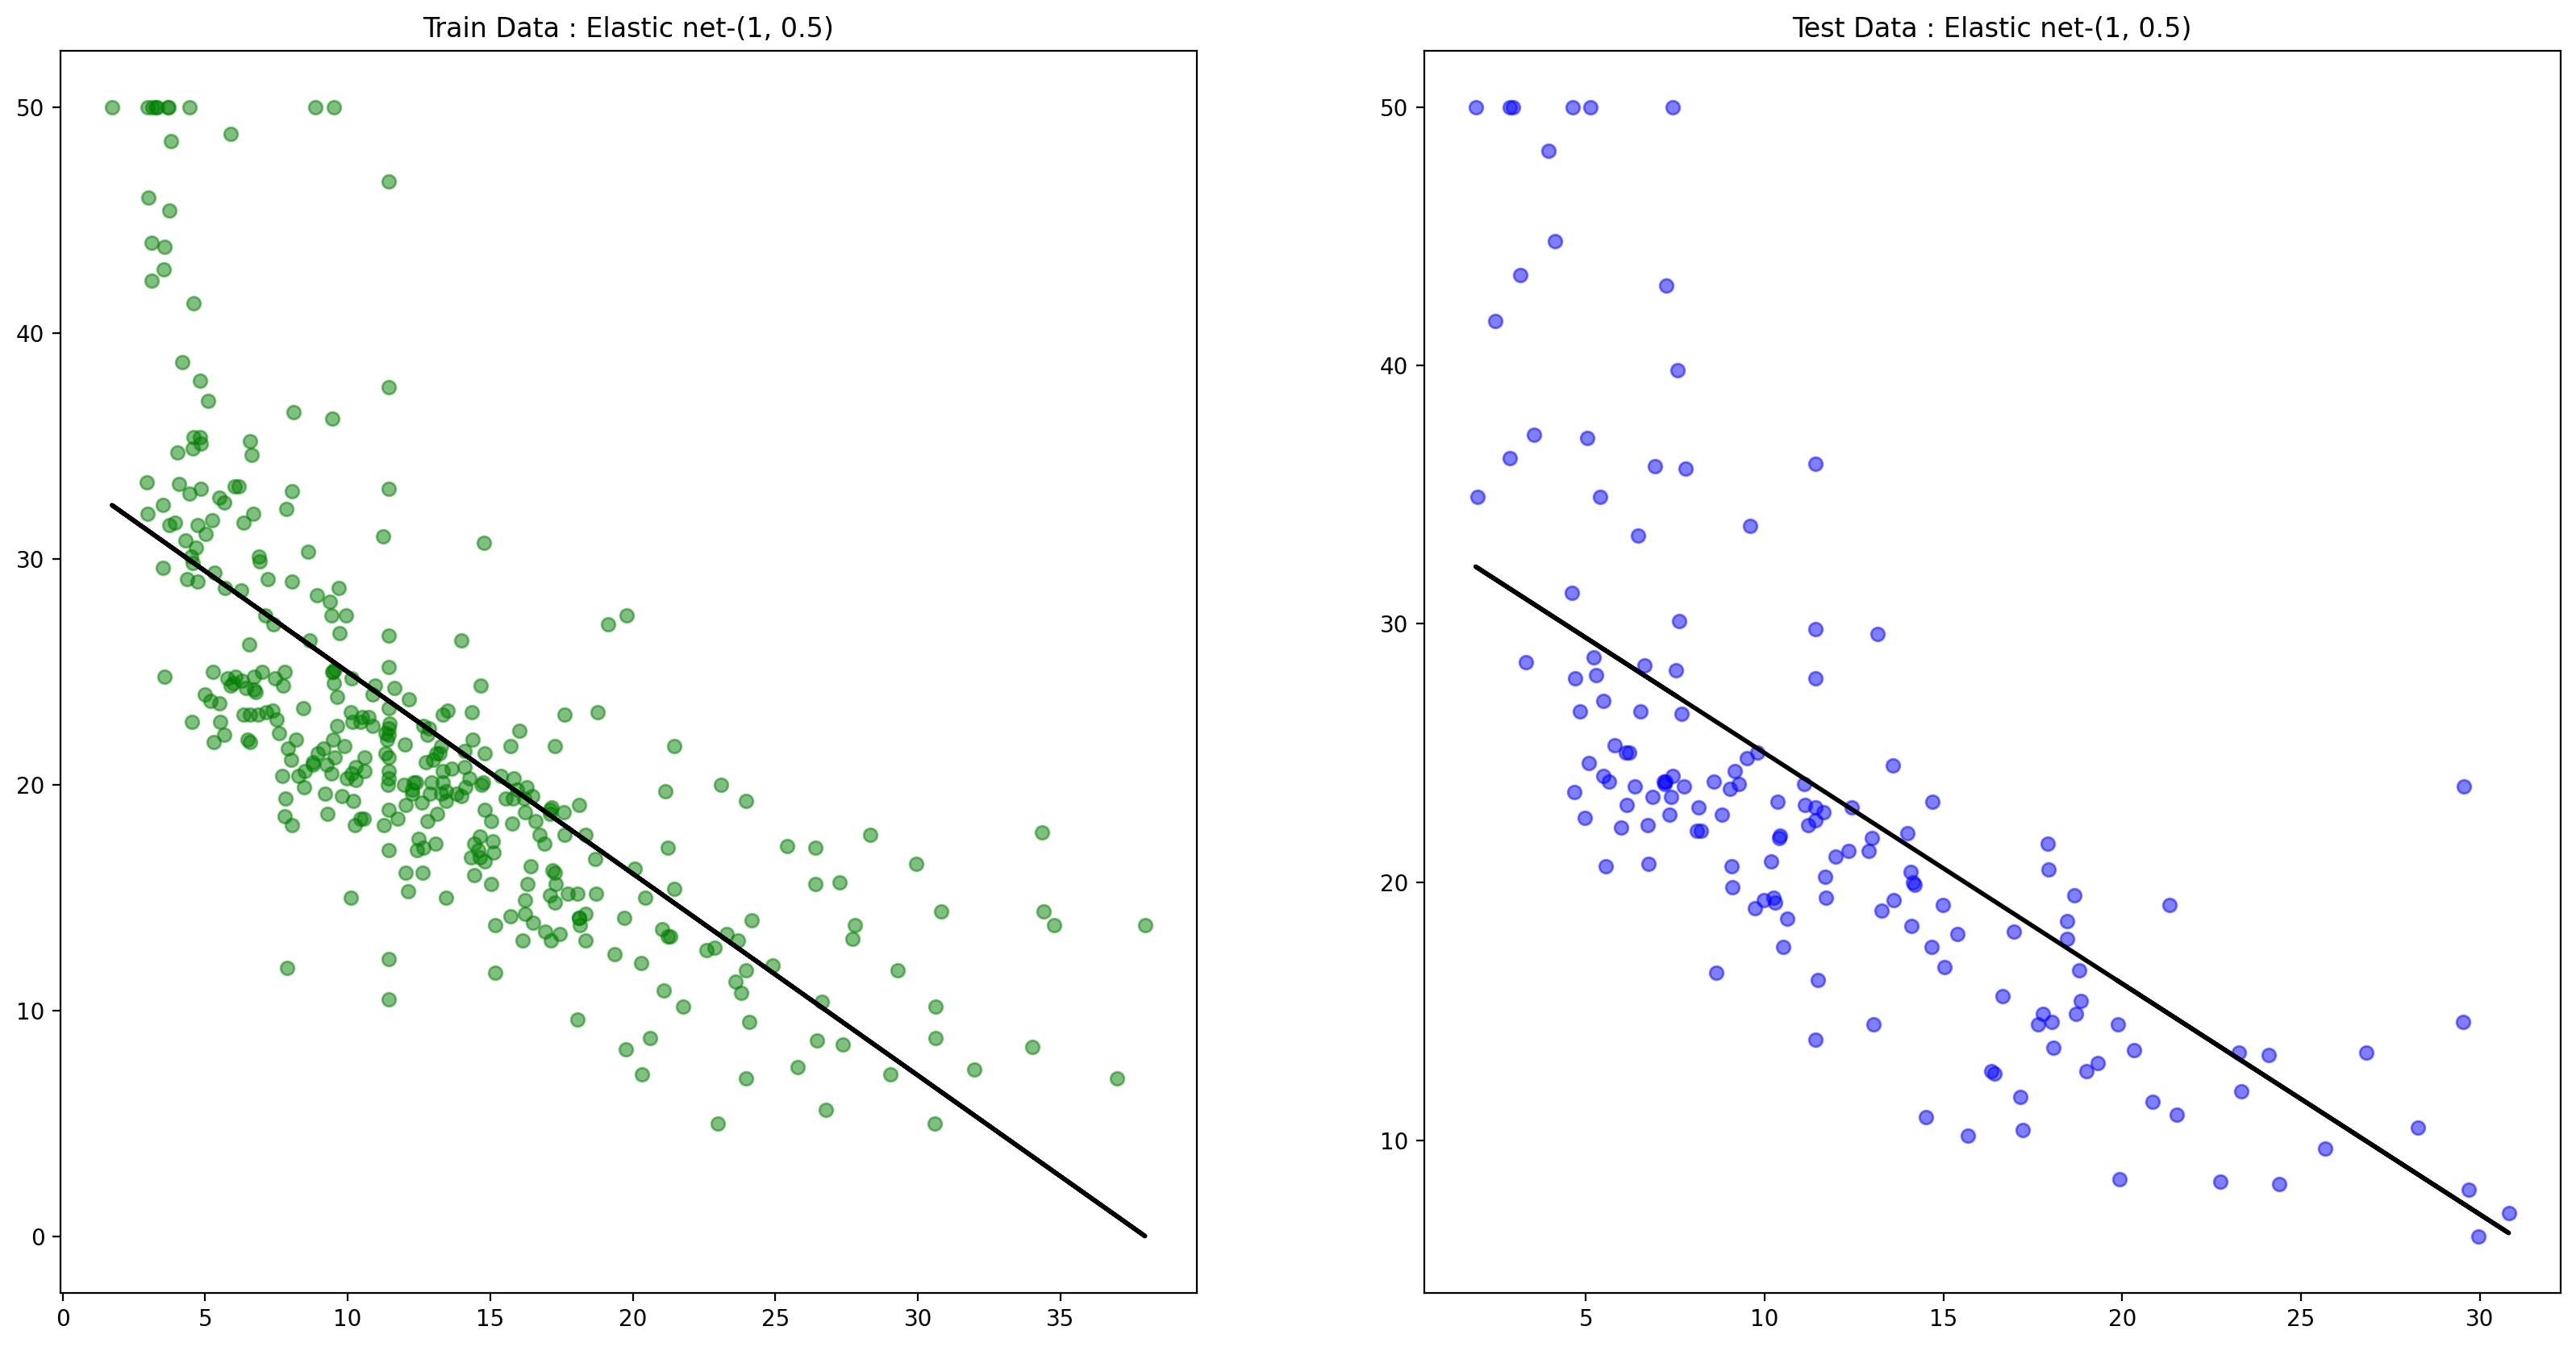

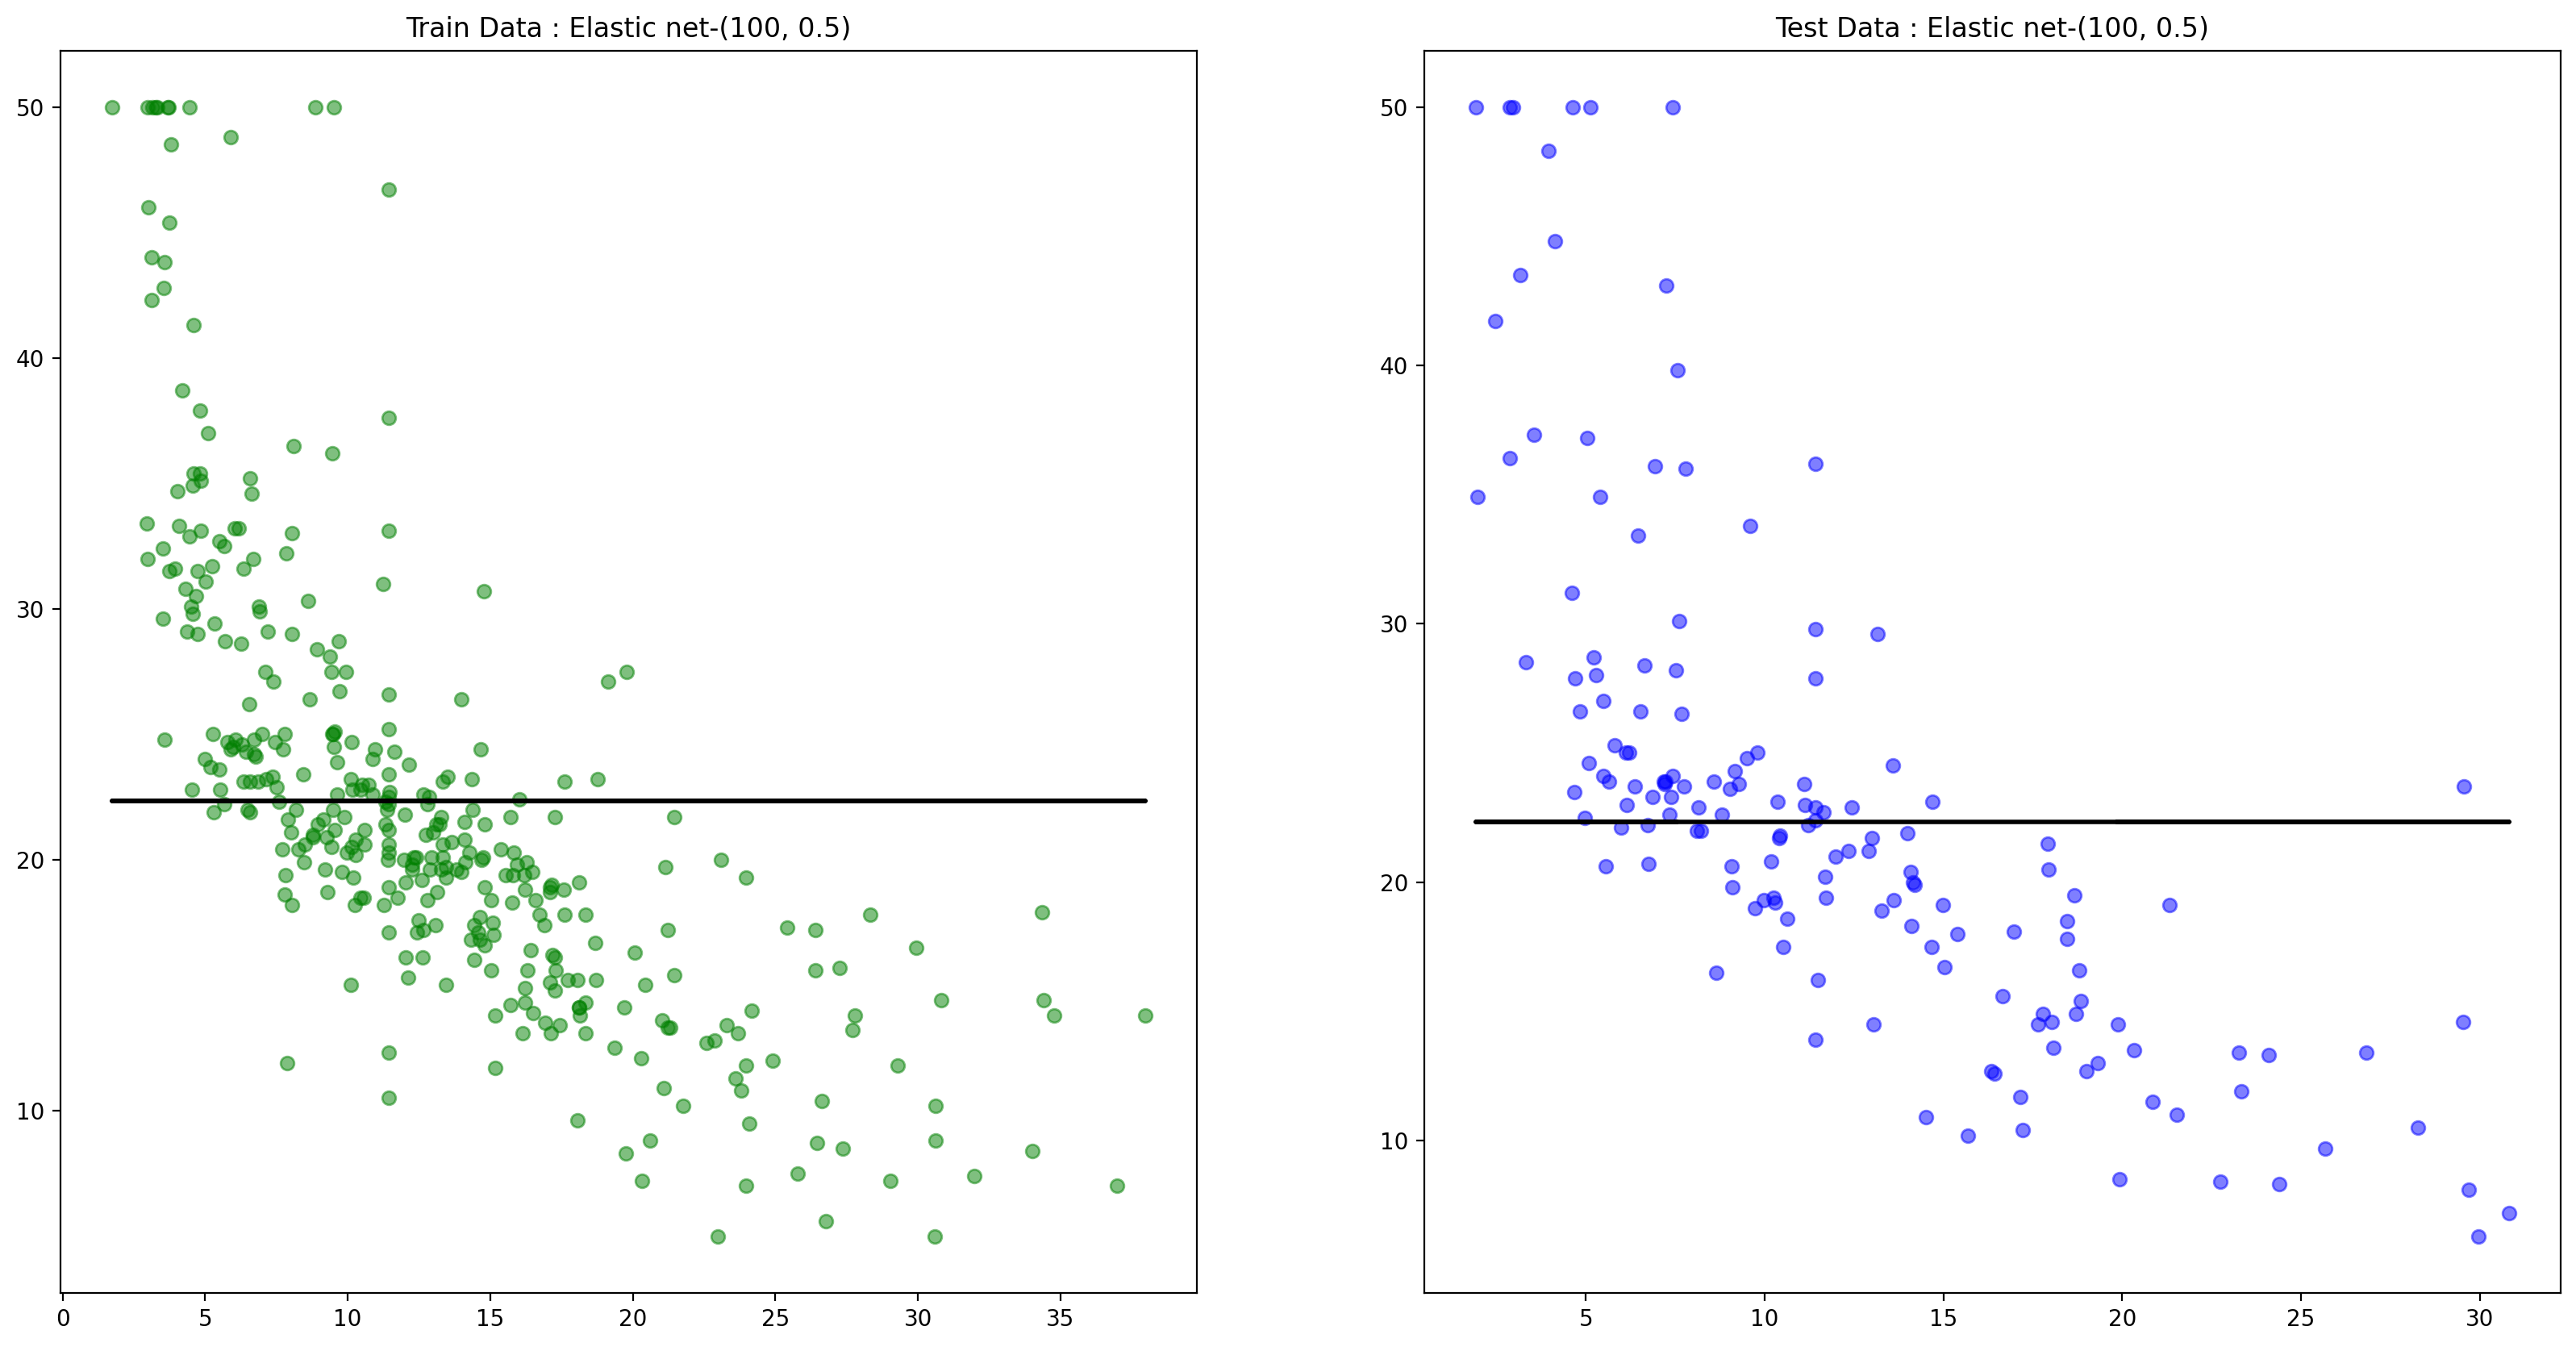

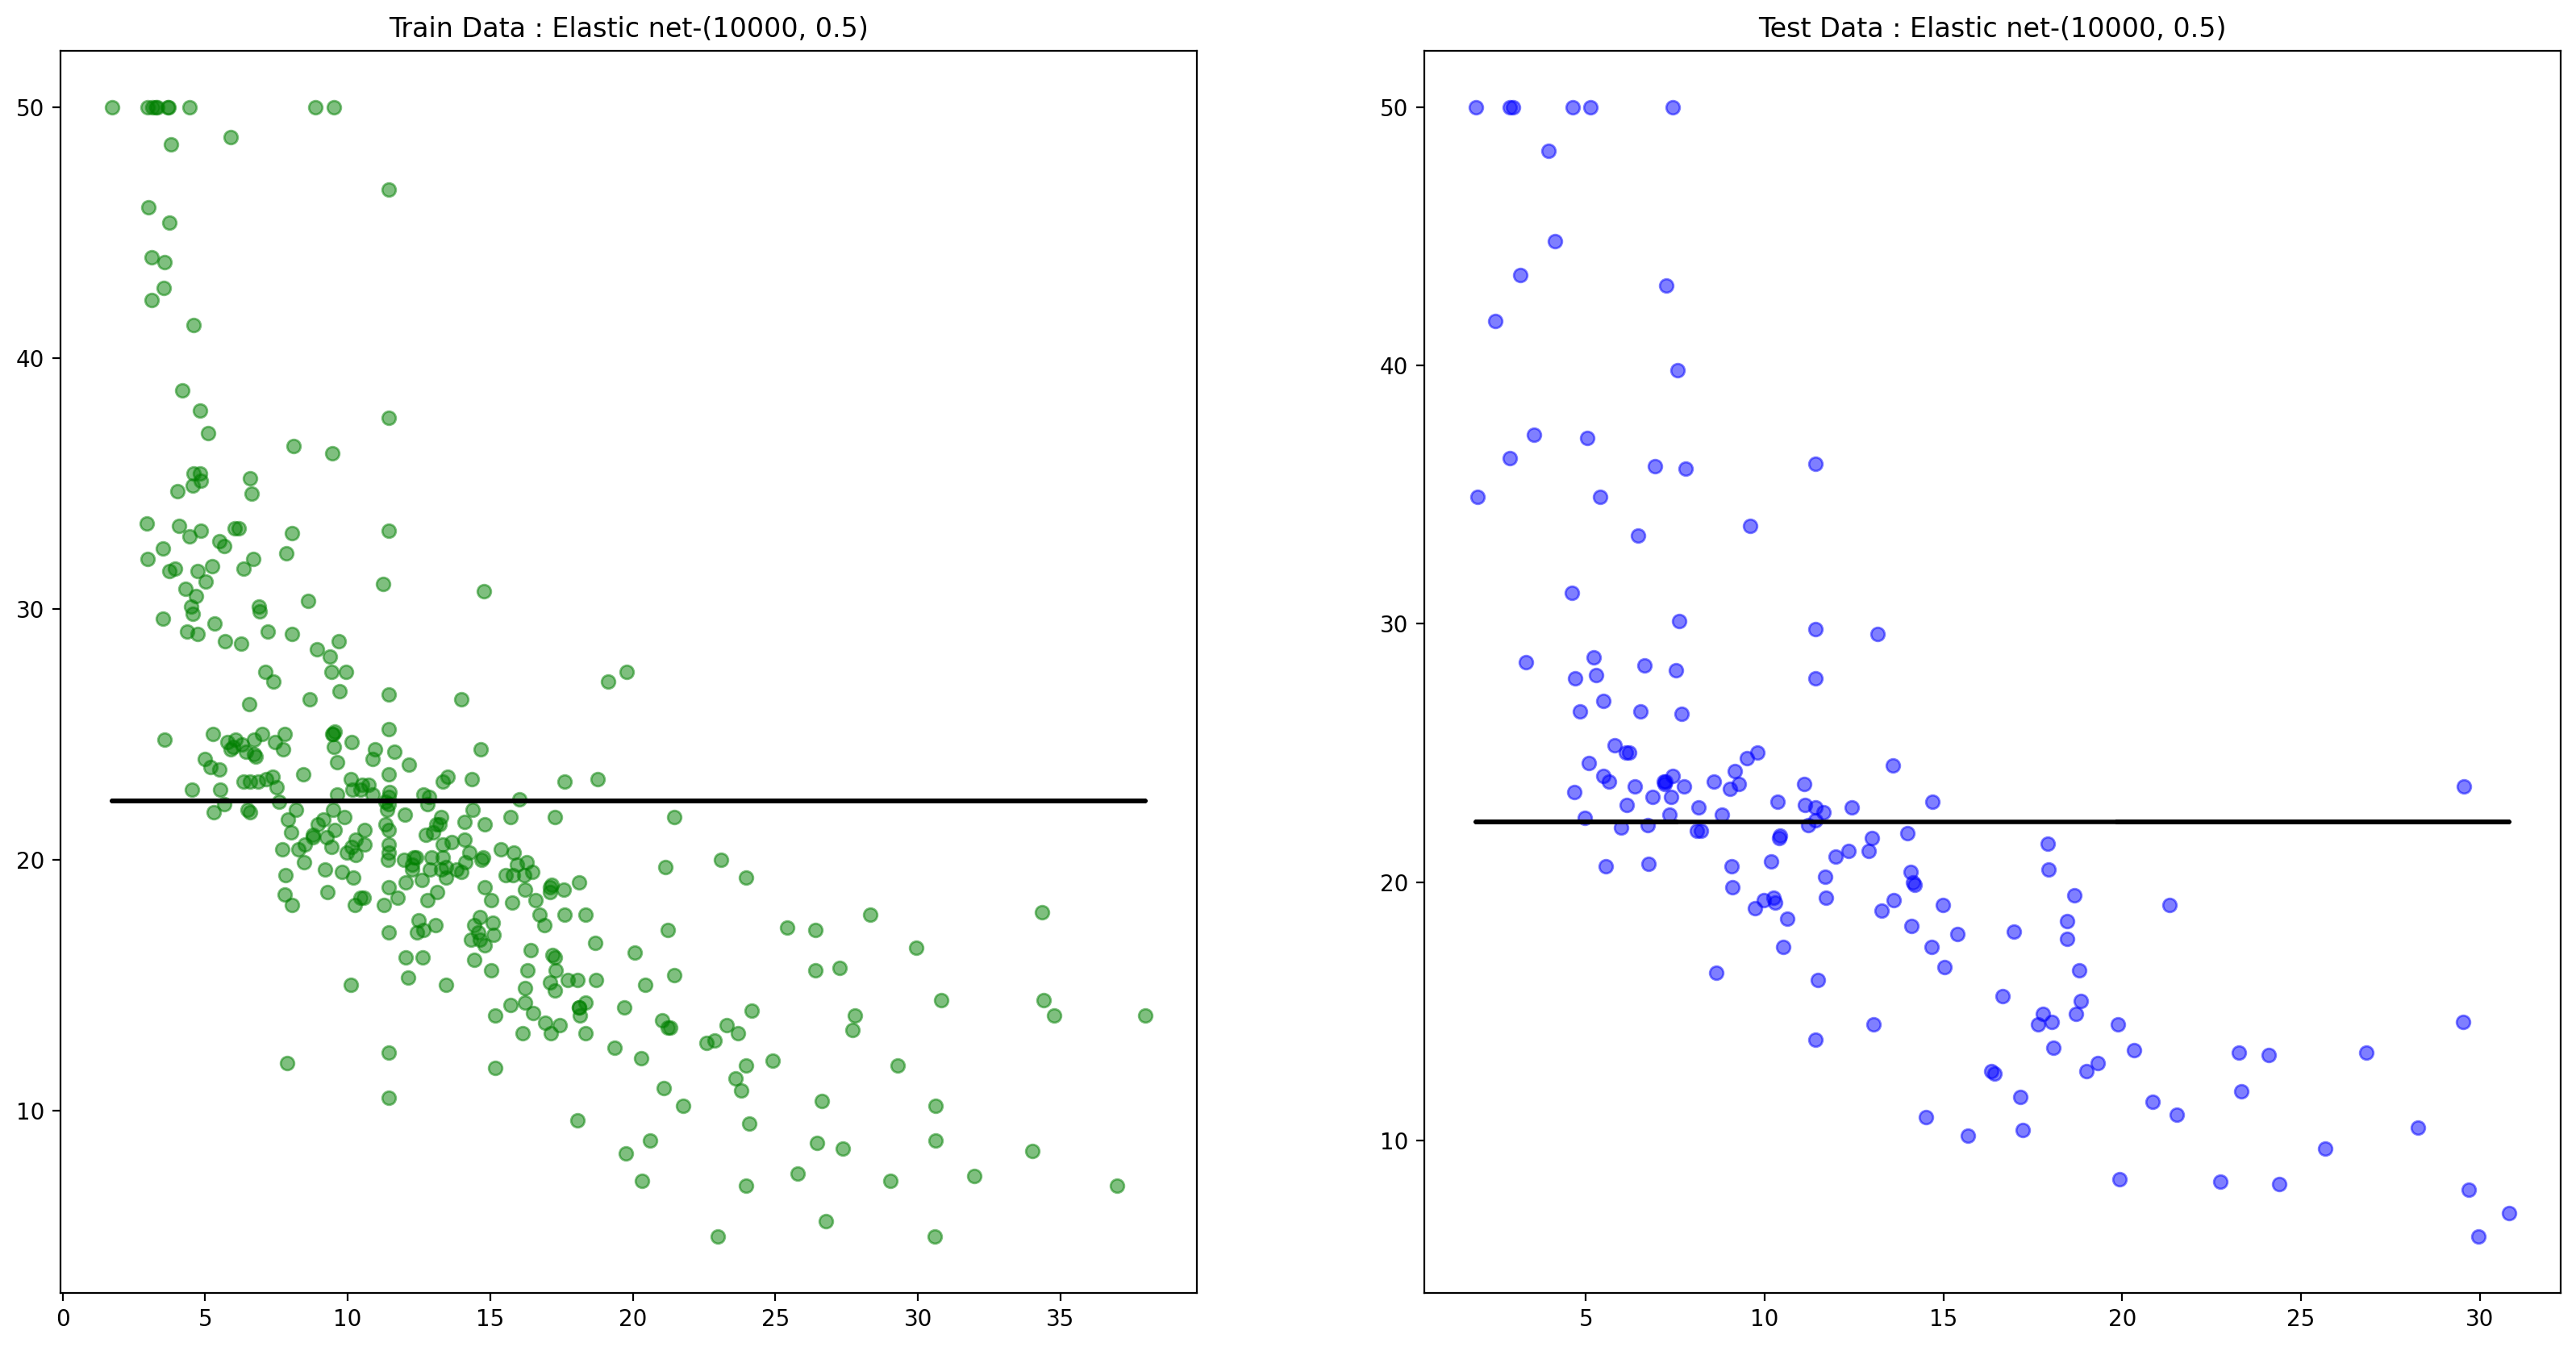

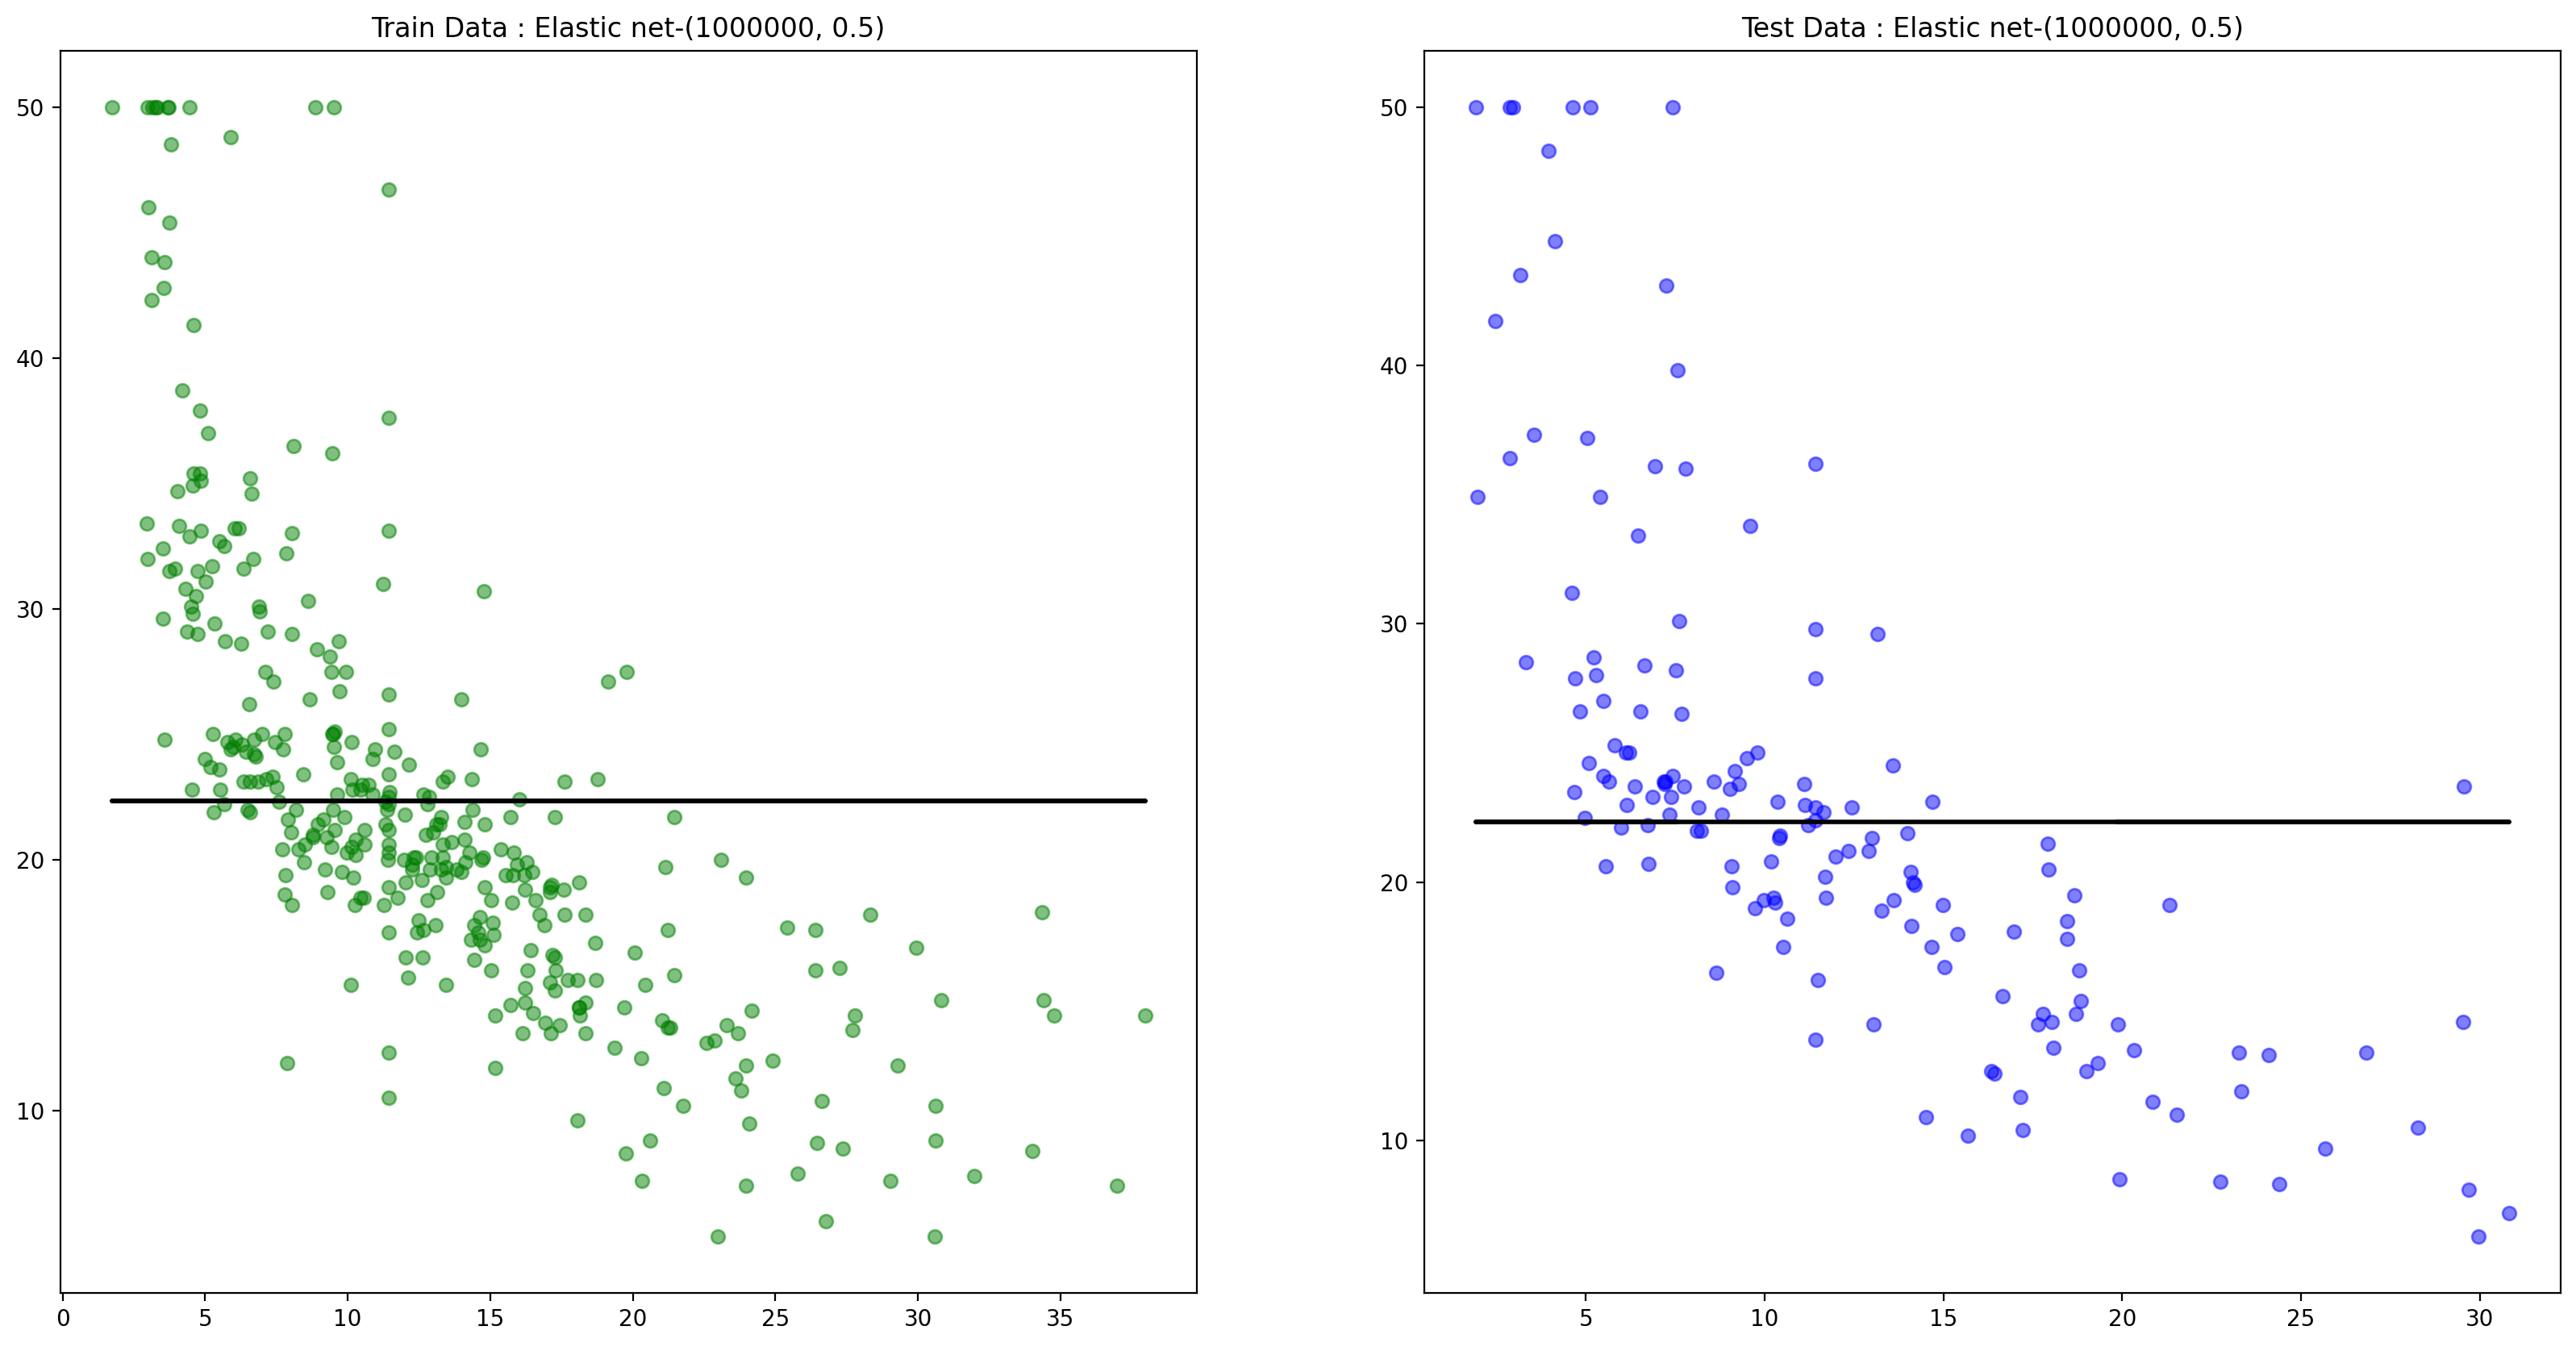

In [30]:
from sklearn.linear_model import ElasticNet


params = [1, 100, 10**4, 10**6]
ratio = [.5, .5, .5, .5]
cols = ['model name', 'Coef', 'Intercept', 'MSE Train', 'MSE Test', 'R2 Train', 'R2 Test']

result = pd.DataFrame(columns = cols)

for alpha, ratio in zip(params, ratio):
    
    ridge = ElasticNet(alpha=alpha, l1_ratio = ratio)
    model_name = f'Elastic net-{alpha, ratio}'
    
    collect = train(ridge, X_train, y_train, X_test, y_test, model_name, cols)
    df2 = pd.DataFrame({
        'model name' : collect[0],
        'Coef' : collect[1],
        'Intercept' : collect[2],
        'MSE Train' : collect[3],
        'MSE Test' : collect[4],
        'R2 Train' : collect[5],
        'R2 Test' : collect[6],
    })
    result = pd.concat([result, df2], axis = 0, ignore_index=True)
    
result